# Training Data Generation

The input images will be cut randomly into smaller pieces to train the neural network.

Press 'Run' (above) or Shift+Enter.

In [5]:
from __future__ import print_function, unicode_literals, absolute_import, division

import numpy as np
import matplotlib.pyplot as plt
import os
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.data import RawData, create_patches
from csbdeep.io import load_training_data, load_training_data_direct
from csbdeep.models import Config, CARE
from csbdeep.data.transform import anisotropic_distortions, permute_axes

Please input the path to the big folder that contains the 'HighRes' and 'LowRes_' images in the box below.
Then press Enter

Folder Path? G:\Attempt_to_train\DAPI
Showing C1-P1_Galvano_A01_G001_0036.tif
Image size = (15, 1024, 1024)


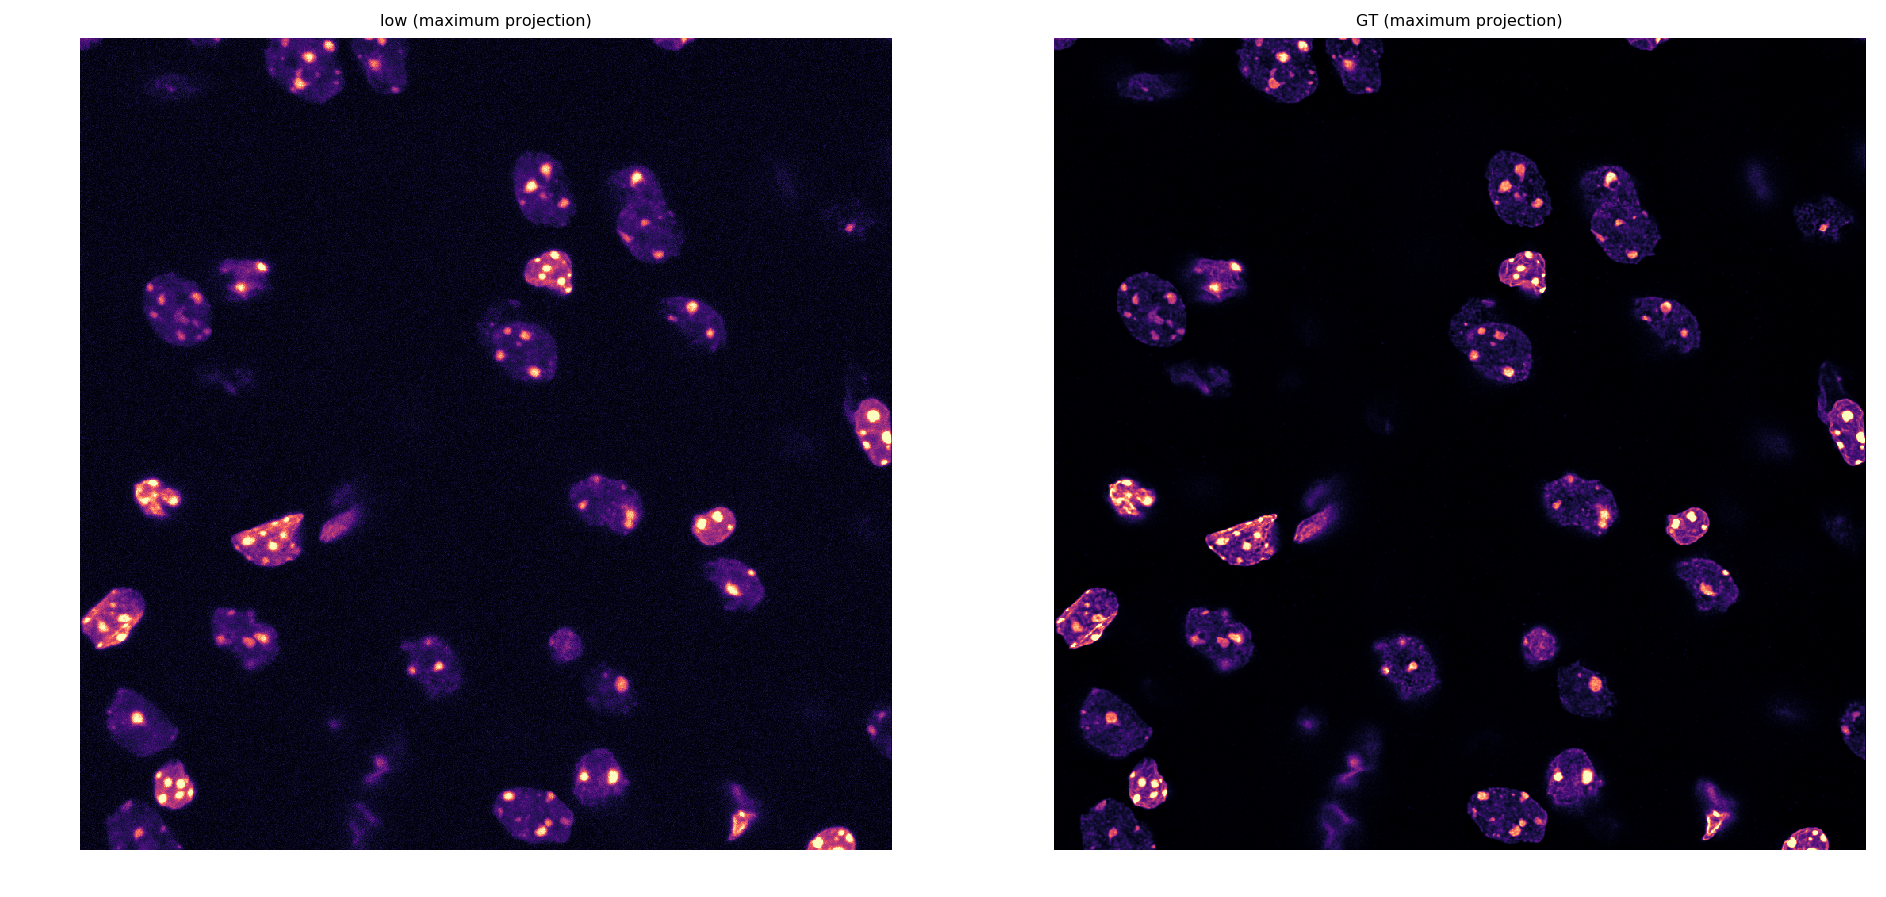

In [10]:
# Ask for folder path
print("Please input the path to the big folder that contains the 'HighRes' and 'LowRes_' images in the box below.")
print("Then press Enter\n")
name = input("Folder Path? ")
directory = name
highres   = '/HighRes/'
lowres    = '/LowRes1/'

# Look for first tif file
for file in os.scandir(directory + highres):
    if file.name.endswith(".tif"):
        break

# Open tif file
y = imread(directory + highres + file.name)
x = imread(directory + lowres + file.name)
print('Showing ' + file.name)
print('Image size =', x.shape)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,y]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

In [ ]:
Ensure that the dimensions and the pairing are correct.

Creating patches
  108 raw images x    1 transformations   =   108 images
  108 images     x 1024 patches per image = 110592 patches in total
Input data:
G:\Attempt_to_train\DAPI: target='G:\Attempt_to_train\DAPI/HighRes/', sources=['LowRes1', 'LowRes2', 'LowRes3'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
8 x 96 x 96


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [07:17<00:00,  4.20s/it]


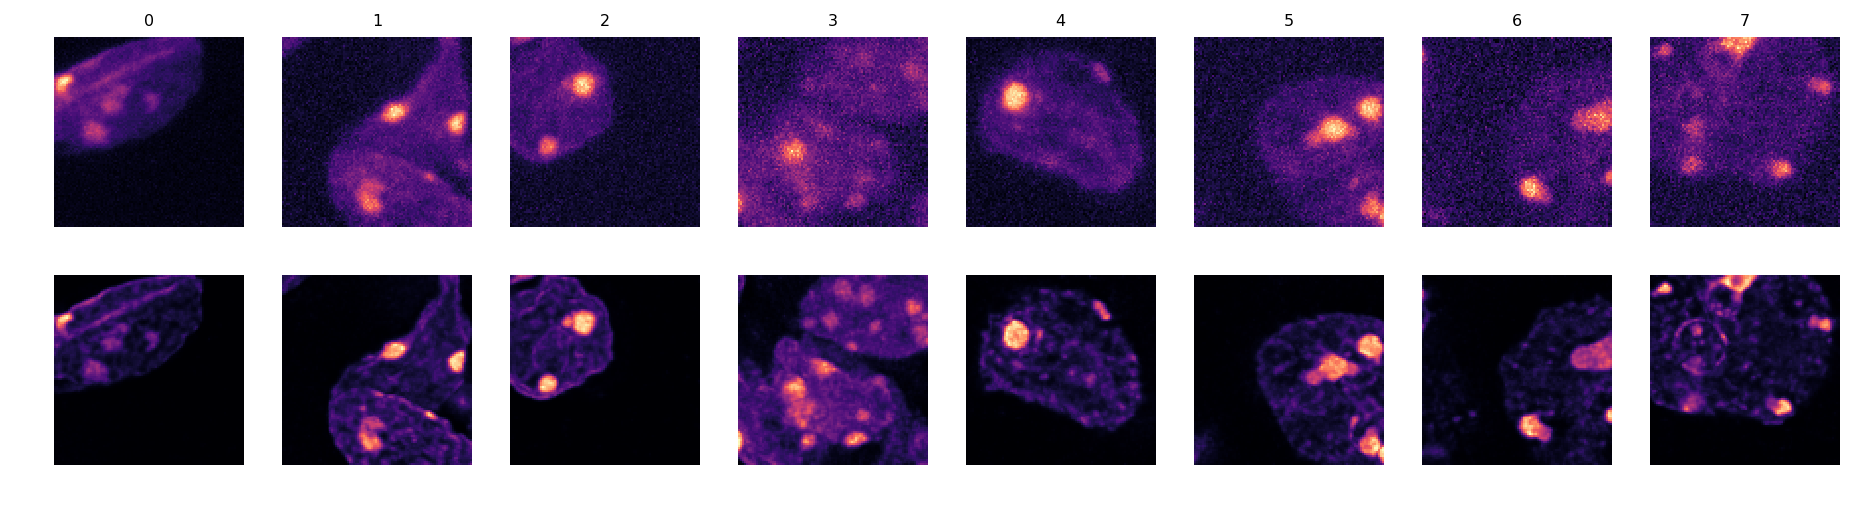

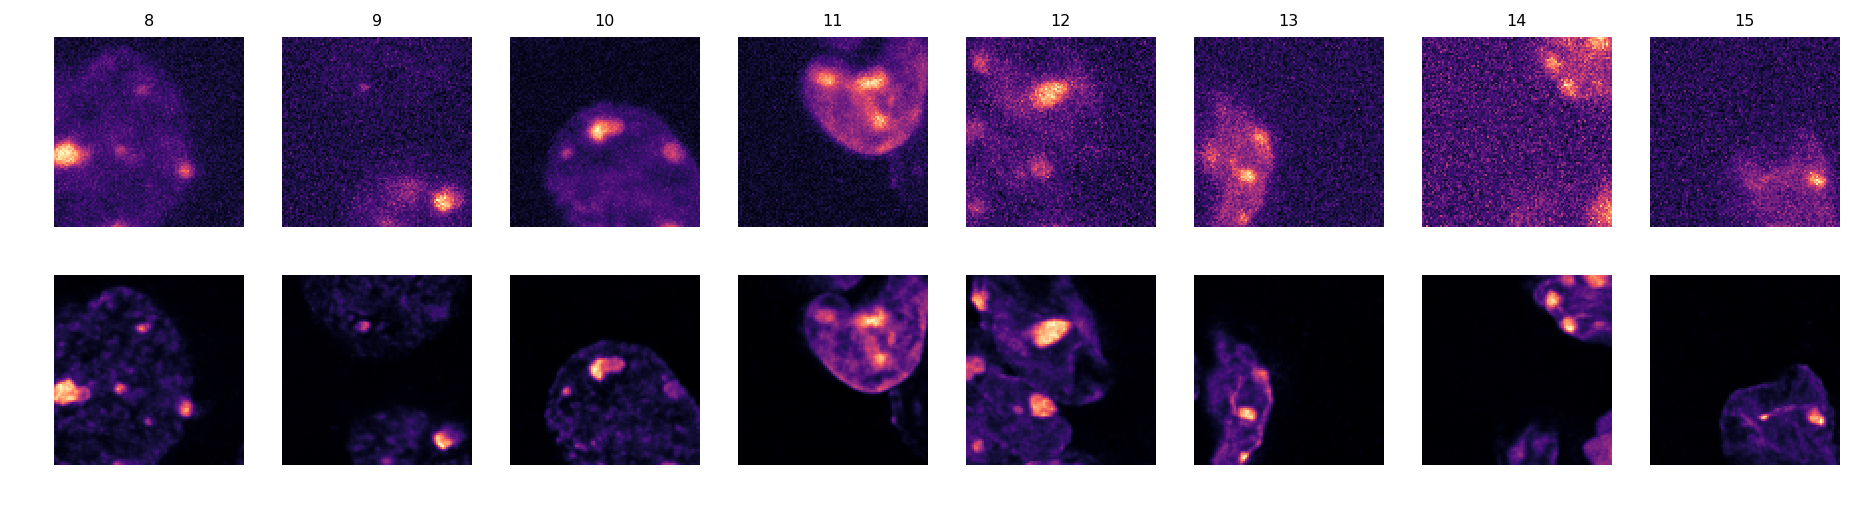

number of training images:	 109486
number of validation images:	 1106
image size (3D):		 (8, 96, 96)
axes:				 SZYXC
channels in / out:		 1 / 1
Config(axes='ZYXC', n_channel_in=1, n_channel_out=1, n_dim=3, probabilistic=False, train_batch_size=32, train_checkpoint='weights_best.h5', train_epochs=50, train_learning_rate=0.0008, train_loss='mae', train_reduce_lr={'factor': 0.5, 'patience': 3, 'min_delta': 0}, train_steps_per_epoch=100, train_tensorboard=True, u_net_n_first=32, unet_input_shape=(None, None, None, 1), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=3, unet_n_first=32, unet_residual=True)
Epoch 1/50
100/100 [==============================] - ETA: 2:11 - loss: 0.1314 - mse: 0.0300 - mae: 0.131 - ETA: 1:31 - loss: 0.1227 - mse: 0.0269 - mae: 0.122 - ETA: 1:18 - loss: 0.1300 - mse: 0.0323 - mae: 0.130 - ETA: 1:11 - loss: 0.1210 - mse: 0.0292 - mae: 0.121 - ETA: 1:07 - loss: 0.1189 - mse: 0.0282 - mae: 0.118 - ETA: 1:03 - loss: 0.1173 - mse: 0.0275 - mae: 0.117 - 

100/100 [==============================] - ETA: 55s - loss: 0.0444 - mse: 0.0067 - mae: 0.04 - ETA: 54s - loss: 0.0427 - mse: 0.0075 - mae: 0.04 - ETA: 54s - loss: 0.0424 - mse: 0.0075 - mae: 0.04 - ETA: 53s - loss: 0.0415 - mse: 0.0072 - mae: 0.04 - ETA: 53s - loss: 0.0415 - mse: 0.0072 - mae: 0.04 - ETA: 52s - loss: 0.0425 - mse: 0.0077 - mae: 0.04 - ETA: 52s - loss: 0.0431 - mse: 0.0079 - mae: 0.04 - ETA: 51s - loss: 0.0431 - mse: 0.0079 - mae: 0.04 - ETA: 50s - loss: 0.0429 - mse: 0.0078 - mae: 0.04 - ETA: 50s - loss: 0.0426 - mse: 0.0076 - mae: 0.04 - ETA: 49s - loss: 0.0421 - mse: 0.0073 - mae: 0.04 - ETA: 49s - loss: 0.0418 - mse: 0.0072 - mae: 0.04 - ETA: 48s - loss: 0.0415 - mse: 0.0071 - mae: 0.04 - ETA: 48s - loss: 0.0416 - mse: 0.0072 - mae: 0.04 - ETA: 47s - loss: 0.0416 - mse: 0.0074 - mae: 0.04 - ETA: 46s - loss: 0.0414 - mse: 0.0073 - mae: 0.04 - ETA: 46s - loss: 0.0412 - mse: 0.0072 - mae: 0.04 - ETA: 45s - loss: 0.0411 - mse: 0.0072 - mae: 0.04 - ETA: 45s - loss: 0.04

100/100 [==============================] - ETA: 59s - loss: 0.0360 - mse: 0.0075 - mae: 0.03 - ETA: 58s - loss: 0.0329 - mse: 0.0057 - mae: 0.03 - ETA: 56s - loss: 0.0321 - mse: 0.0050 - mae: 0.03 - ETA: 56s - loss: 0.0318 - mse: 0.0049 - mae: 0.03 - ETA: 55s - loss: 0.0313 - mse: 0.0045 - mae: 0.03 - ETA: 54s - loss: 0.0312 - mse: 0.0044 - mae: 0.03 - ETA: 53s - loss: 0.0311 - mse: 0.0043 - mae: 0.03 - ETA: 53s - loss: 0.0311 - mse: 0.0042 - mae: 0.03 - ETA: 53s - loss: 0.0311 - mse: 0.0041 - mae: 0.03 - ETA: 52s - loss: 0.0316 - mse: 0.0043 - mae: 0.03 - ETA: 52s - loss: 0.0325 - mse: 0.0043 - mae: 0.03 - ETA: 52s - loss: 0.0324 - mse: 0.0042 - mae: 0.03 - ETA: 51s - loss: 0.0342 - mse: 0.0046 - mae: 0.03 - ETA: 50s - loss: 0.0342 - mse: 0.0045 - mae: 0.03 - ETA: 50s - loss: 0.0346 - mse: 0.0045 - mae: 0.03 - ETA: 49s - loss: 0.0345 - mse: 0.0045 - mae: 0.03 - ETA: 49s - loss: 0.0348 - mse: 0.0045 - mae: 0.03 - ETA: 48s - loss: 0.0349 - mse: 0.0046 - mae: 0.03 - ETA: 48s - loss: 0.03

100/100 [==============================] - ETA: 54s - loss: 0.0286 - mse: 0.0037 - mae: 0.02 - ETA: 54s - loss: 0.0293 - mse: 0.0036 - mae: 0.02 - ETA: 54s - loss: 0.0278 - mse: 0.0032 - mae: 0.02 - ETA: 54s - loss: 0.0284 - mse: 0.0032 - mae: 0.02 - ETA: 54s - loss: 0.0284 - mse: 0.0032 - mae: 0.02 - ETA: 54s - loss: 0.0283 - mse: 0.0033 - mae: 0.02 - ETA: 54s - loss: 0.0283 - mse: 0.0033 - mae: 0.02 - ETA: 53s - loss: 0.0285 - mse: 0.0033 - mae: 0.02 - ETA: 52s - loss: 0.0285 - mse: 0.0033 - mae: 0.02 - ETA: 51s - loss: 0.0285 - mse: 0.0032 - mae: 0.02 - ETA: 51s - loss: 0.0284 - mse: 0.0032 - mae: 0.02 - ETA: 50s - loss: 0.0286 - mse: 0.0032 - mae: 0.02 - ETA: 50s - loss: 0.0285 - mse: 0.0032 - mae: 0.02 - ETA: 49s - loss: 0.0281 - mse: 0.0032 - mae: 0.02 - ETA: 49s - loss: 0.0285 - mse: 0.0033 - mae: 0.02 - ETA: 48s - loss: 0.0285 - mse: 0.0033 - mae: 0.02 - ETA: 47s - loss: 0.0284 - mse: 0.0033 - mae: 0.02 - ETA: 47s - loss: 0.0282 - mse: 0.0033 - mae: 0.02 - ETA: 46s - loss: 0.02

100/100 [==============================] - ETA: 59s - loss: 0.0294 - mse: 0.0033 - mae: 0.02 - ETA: 57s - loss: 0.0265 - mse: 0.0027 - mae: 0.02 - ETA: 56s - loss: 0.0283 - mse: 0.0034 - mae: 0.02 - ETA: 56s - loss: 0.0286 - mse: 0.0032 - mae: 0.02 - ETA: 55s - loss: 0.0276 - mse: 0.0030 - mae: 0.02 - ETA: 55s - loss: 0.0291 - mse: 0.0031 - mae: 0.02 - ETA: 54s - loss: 0.0299 - mse: 0.0033 - mae: 0.02 - ETA: 53s - loss: 0.0300 - mse: 0.0033 - mae: 0.03 - ETA: 53s - loss: 0.0299 - mse: 0.0034 - mae: 0.02 - ETA: 52s - loss: 0.0297 - mse: 0.0034 - mae: 0.02 - ETA: 52s - loss: 0.0294 - mse: 0.0034 - mae: 0.02 - ETA: 52s - loss: 0.0293 - mse: 0.0034 - mae: 0.02 - ETA: 51s - loss: 0.0293 - mse: 0.0034 - mae: 0.02 - ETA: 51s - loss: 0.0290 - mse: 0.0034 - mae: 0.02 - ETA: 50s - loss: 0.0287 - mse: 0.0033 - mae: 0.02 - ETA: 49s - loss: 0.0287 - mse: 0.0033 - mae: 0.02 - ETA: 49s - loss: 0.0287 - mse: 0.0033 - mae: 0.02 - ETA: 48s - loss: 0.0285 - mse: 0.0033 - mae: 0.02 - ETA: 48s - loss: 0.02

100/100 [==============================] - ETA: 1:00 - loss: 0.0243 - mse: 0.0029 - mae: 0.024 - ETA: 58s - loss: 0.0245 - mse: 0.0029 - mae: 0.024 - ETA: 57s - loss: 0.0256 - mse: 0.0031 - mae: 0.02 - ETA: 56s - loss: 0.0252 - mse: 0.0029 - mae: 0.02 - ETA: 55s - loss: 0.0254 - mse: 0.0029 - mae: 0.02 - ETA: 54s - loss: 0.0251 - mse: 0.0028 - mae: 0.02 - ETA: 53s - loss: 0.0251 - mse: 0.0028 - mae: 0.02 - ETA: 53s - loss: 0.0253 - mse: 0.0027 - mae: 0.02 - ETA: 53s - loss: 0.0250 - mse: 0.0027 - mae: 0.02 - ETA: 53s - loss: 0.0249 - mse: 0.0027 - mae: 0.02 - ETA: 52s - loss: 0.0249 - mse: 0.0027 - mae: 0.02 - ETA: 52s - loss: 0.0249 - mse: 0.0027 - mae: 0.02 - ETA: 51s - loss: 0.0252 - mse: 0.0028 - mae: 0.02 - ETA: 51s - loss: 0.0254 - mse: 0.0029 - mae: 0.02 - ETA: 50s - loss: 0.0251 - mse: 0.0029 - mae: 0.02 - ETA: 49s - loss: 0.0252 - mse: 0.0029 - mae: 0.02 - ETA: 49s - loss: 0.0253 - mse: 0.0029 - mae: 0.02 - ETA: 48s - loss: 0.0253 - mse: 0.0029 - mae: 0.02 - ETA: 47s - loss: 0

100/100 [==============================] - ETA: 59s - loss: 0.0255 - mse: 0.0023 - mae: 0.02 - ETA: 59s - loss: 0.0239 - mse: 0.0024 - mae: 0.02 - ETA: 57s - loss: 0.0248 - mse: 0.0026 - mae: 0.02 - ETA: 56s - loss: 0.0244 - mse: 0.0024 - mae: 0.02 - ETA: 56s - loss: 0.0243 - mse: 0.0024 - mae: 0.02 - ETA: 56s - loss: 0.0241 - mse: 0.0024 - mae: 0.02 - ETA: 55s - loss: 0.0246 - mse: 0.0027 - mae: 0.02 - ETA: 54s - loss: 0.0248 - mse: 0.0028 - mae: 0.02 - ETA: 54s - loss: 0.0251 - mse: 0.0028 - mae: 0.02 - ETA: 53s - loss: 0.0249 - mse: 0.0027 - mae: 0.02 - ETA: 52s - loss: 0.0251 - mse: 0.0027 - mae: 0.02 - ETA: 51s - loss: 0.0252 - mse: 0.0029 - mae: 0.02 - ETA: 51s - loss: 0.0250 - mse: 0.0028 - mae: 0.02 - ETA: 50s - loss: 0.0249 - mse: 0.0028 - mae: 0.02 - ETA: 50s - loss: 0.0250 - mse: 0.0028 - mae: 0.02 - ETA: 49s - loss: 0.0249 - mse: 0.0028 - mae: 0.02 - ETA: 49s - loss: 0.0247 - mse: 0.0027 - mae: 0.02 - ETA: 48s - loss: 0.0248 - mse: 0.0027 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 55s - loss: 0.0259 - mse: 0.0027 - mae: 0.02 - ETA: 54s - loss: 0.0250 - mse: 0.0027 - mae: 0.02 - ETA: 54s - loss: 0.0242 - mse: 0.0025 - mae: 0.02 - ETA: 53s - loss: 0.0238 - mse: 0.0024 - mae: 0.02 - ETA: 53s - loss: 0.0238 - mse: 0.0024 - mae: 0.02 - ETA: 53s - loss: 0.0233 - mse: 0.0024 - mae: 0.02 - ETA: 52s - loss: 0.0233 - mse: 0.0024 - mae: 0.02 - ETA: 52s - loss: 0.0235 - mse: 0.0024 - mae: 0.02 - ETA: 51s - loss: 0.0237 - mse: 0.0024 - mae: 0.02 - ETA: 51s - loss: 0.0237 - mse: 0.0024 - mae: 0.02 - ETA: 50s - loss: 0.0237 - mse: 0.0024 - mae: 0.02 - ETA: 49s - loss: 0.0240 - mse: 0.0024 - mae: 0.02 - ETA: 49s - loss: 0.0239 - mse: 0.0024 - mae: 0.02 - ETA: 48s - loss: 0.0240 - mse: 0.0025 - mae: 0.02 - ETA: 48s - loss: 0.0241 - mse: 0.0025 - mae: 0.02 - ETA: 47s - loss: 0.0241 - mse: 0.0025 - mae: 0.02 - ETA: 47s - loss: 0.0239 - mse: 0.0025 - mae: 0.02 - ETA: 46s - loss: 0.0240 - mse: 0.0025 - mae: 0.02 - ETA: 46s - loss: 0.02

100/100 [==============================] - ETA: 55s - loss: 0.0231 - mse: 0.0021 - mae: 0.02 - ETA: 57s - loss: 0.0240 - mse: 0.0023 - mae: 0.02 - ETA: 58s - loss: 0.0243 - mse: 0.0024 - mae: 0.02 - ETA: 58s - loss: 0.0242 - mse: 0.0024 - mae: 0.02 - ETA: 57s - loss: 0.0239 - mse: 0.0024 - mae: 0.02 - ETA: 56s - loss: 0.0243 - mse: 0.0025 - mae: 0.02 - ETA: 55s - loss: 0.0240 - mse: 0.0025 - mae: 0.02 - ETA: 55s - loss: 0.0245 - mse: 0.0026 - mae: 0.02 - ETA: 54s - loss: 0.0247 - mse: 0.0027 - mae: 0.02 - ETA: 53s - loss: 0.0249 - mse: 0.0027 - mae: 0.02 - ETA: 52s - loss: 0.0253 - mse: 0.0028 - mae: 0.02 - ETA: 51s - loss: 0.0252 - mse: 0.0028 - mae: 0.02 - ETA: 51s - loss: 0.0252 - mse: 0.0027 - mae: 0.02 - ETA: 50s - loss: 0.0251 - mse: 0.0027 - mae: 0.02 - ETA: 49s - loss: 0.0252 - mse: 0.0028 - mae: 0.02 - ETA: 48s - loss: 0.0251 - mse: 0.0027 - mae: 0.02 - ETA: 48s - loss: 0.0251 - mse: 0.0027 - mae: 0.02 - ETA: 47s - loss: 0.0250 - mse: 0.0027 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 1:00 - loss: 0.0220 - mse: 0.0022 - mae: 0.022 - ETA: 59s - loss: 0.0241 - mse: 0.0027 - mae: 0.024 - ETA: 59s - loss: 0.0229 - mse: 0.0026 - mae: 0.02 - ETA: 58s - loss: 0.0235 - mse: 0.0027 - mae: 0.02 - ETA: 58s - loss: 0.0234 - mse: 0.0026 - mae: 0.02 - ETA: 57s - loss: 0.0233 - mse: 0.0026 - mae: 0.02 - ETA: 56s - loss: 0.0231 - mse: 0.0026 - mae: 0.02 - ETA: 55s - loss: 0.0229 - mse: 0.0025 - mae: 0.02 - ETA: 54s - loss: 0.0229 - mse: 0.0025 - mae: 0.02 - ETA: 53s - loss: 0.0231 - mse: 0.0025 - mae: 0.02 - ETA: 53s - loss: 0.0232 - mse: 0.0025 - mae: 0.02 - ETA: 52s - loss: 0.0230 - mse: 0.0024 - mae: 0.02 - ETA: 51s - loss: 0.0231 - mse: 0.0025 - mae: 0.02 - ETA: 51s - loss: 0.0231 - mse: 0.0025 - mae: 0.02 - ETA: 50s - loss: 0.0229 - mse: 0.0024 - mae: 0.02 - ETA: 49s - loss: 0.0228 - mse: 0.0024 - mae: 0.02 - ETA: 49s - loss: 0.0227 - mse: 0.0024 - mae: 0.02 - ETA: 48s - loss: 0.0226 - mse: 0.0023 - mae: 0.02 - ETA: 47s - loss: 0

100/100 [==============================] - ETA: 56s - loss: 0.0239 - mse: 0.0022 - mae: 0.02 - ETA: 56s - loss: 0.0227 - mse: 0.0023 - mae: 0.02 - ETA: 55s - loss: 0.0243 - mse: 0.0025 - mae: 0.02 - ETA: 55s - loss: 0.0239 - mse: 0.0027 - mae: 0.02 - ETA: 55s - loss: 0.0241 - mse: 0.0027 - mae: 0.02 - ETA: 54s - loss: 0.0237 - mse: 0.0026 - mae: 0.02 - ETA: 53s - loss: 0.0238 - mse: 0.0027 - mae: 0.02 - ETA: 53s - loss: 0.0239 - mse: 0.0027 - mae: 0.02 - ETA: 52s - loss: 0.0240 - mse: 0.0027 - mae: 0.02 - ETA: 52s - loss: 0.0240 - mse: 0.0026 - mae: 0.02 - ETA: 52s - loss: 0.0240 - mse: 0.0026 - mae: 0.02 - ETA: 51s - loss: 0.0240 - mse: 0.0026 - mae: 0.02 - ETA: 51s - loss: 0.0242 - mse: 0.0027 - mae: 0.02 - ETA: 50s - loss: 0.0243 - mse: 0.0027 - mae: 0.02 - ETA: 50s - loss: 0.0241 - mse: 0.0027 - mae: 0.02 - ETA: 49s - loss: 0.0241 - mse: 0.0026 - mae: 0.02 - ETA: 48s - loss: 0.0240 - mse: 0.0026 - mae: 0.02 - ETA: 48s - loss: 0.0239 - mse: 0.0026 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 57s - loss: 0.0243 - mse: 0.0033 - mae: 0.02 - ETA: 56s - loss: 0.0238 - mse: 0.0030 - mae: 0.02 - ETA: 56s - loss: 0.0234 - mse: 0.0028 - mae: 0.02 - ETA: 55s - loss: 0.0233 - mse: 0.0027 - mae: 0.02 - ETA: 54s - loss: 0.0227 - mse: 0.0025 - mae: 0.02 - ETA: 54s - loss: 0.0227 - mse: 0.0026 - mae: 0.02 - ETA: 54s - loss: 0.0227 - mse: 0.0026 - mae: 0.02 - ETA: 54s - loss: 0.0225 - mse: 0.0025 - mae: 0.02 - ETA: 53s - loss: 0.0224 - mse: 0.0025 - mae: 0.02 - ETA: 53s - loss: 0.0226 - mse: 0.0025 - mae: 0.02 - ETA: 52s - loss: 0.0226 - mse: 0.0025 - mae: 0.02 - ETA: 52s - loss: 0.0226 - mse: 0.0024 - mae: 0.02 - ETA: 51s - loss: 0.0228 - mse: 0.0025 - mae: 0.02 - ETA: 50s - loss: 0.0226 - mse: 0.0025 - mae: 0.02 - ETA: 50s - loss: 0.0225 - mse: 0.0024 - mae: 0.02 - ETA: 49s - loss: 0.0226 - mse: 0.0025 - mae: 0.02 - ETA: 48s - loss: 0.0226 - mse: 0.0025 - mae: 0.02 - ETA: 48s - loss: 0.0226 - mse: 0.0025 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 57s - loss: 0.0250 - mse: 0.0035 - mae: 0.02 - ETA: 57s - loss: 0.0233 - mse: 0.0027 - mae: 0.02 - ETA: 56s - loss: 0.0238 - mse: 0.0027 - mae: 0.02 - ETA: 56s - loss: 0.0238 - mse: 0.0026 - mae: 0.02 - ETA: 55s - loss: 0.0237 - mse: 0.0026 - mae: 0.02 - ETA: 54s - loss: 0.0237 - mse: 0.0025 - mae: 0.02 - ETA: 53s - loss: 0.0238 - mse: 0.0025 - mae: 0.02 - ETA: 53s - loss: 0.0234 - mse: 0.0024 - mae: 0.02 - ETA: 52s - loss: 0.0236 - mse: 0.0024 - mae: 0.02 - ETA: 51s - loss: 0.0235 - mse: 0.0023 - mae: 0.02 - ETA: 51s - loss: 0.0238 - mse: 0.0024 - mae: 0.02 - ETA: 50s - loss: 0.0241 - mse: 0.0025 - mae: 0.02 - ETA: 49s - loss: 0.0243 - mse: 0.0025 - mae: 0.02 - ETA: 49s - loss: 0.0243 - mse: 0.0025 - mae: 0.02 - ETA: 49s - loss: 0.0239 - mse: 0.0024 - mae: 0.02 - ETA: 48s - loss: 0.0239 - mse: 0.0025 - mae: 0.02 - ETA: 48s - loss: 0.0240 - mse: 0.0025 - mae: 0.02 - ETA: 47s - loss: 0.0242 - mse: 0.0025 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 55s - loss: 0.0199 - mse: 0.0020 - mae: 0.01 - ETA: 55s - loss: 0.0239 - mse: 0.0034 - mae: 0.02 - ETA: 56s - loss: 0.0235 - mse: 0.0029 - mae: 0.02 - ETA: 55s - loss: 0.0234 - mse: 0.0027 - mae: 0.02 - ETA: 54s - loss: 0.0236 - mse: 0.0027 - mae: 0.02 - ETA: 53s - loss: 0.0239 - mse: 0.0026 - mae: 0.02 - ETA: 53s - loss: 0.0236 - mse: 0.0026 - mae: 0.02 - ETA: 53s - loss: 0.0242 - mse: 0.0027 - mae: 0.02 - ETA: 53s - loss: 0.0241 - mse: 0.0026 - mae: 0.02 - ETA: 53s - loss: 0.0240 - mse: 0.0026 - mae: 0.02 - ETA: 52s - loss: 0.0240 - mse: 0.0026 - mae: 0.02 - ETA: 52s - loss: 0.0241 - mse: 0.0026 - mae: 0.02 - ETA: 51s - loss: 0.0238 - mse: 0.0026 - mae: 0.02 - ETA: 51s - loss: 0.0240 - mse: 0.0026 - mae: 0.02 - ETA: 50s - loss: 0.0240 - mse: 0.0026 - mae: 0.02 - ETA: 49s - loss: 0.0239 - mse: 0.0026 - mae: 0.02 - ETA: 49s - loss: 0.0239 - mse: 0.0026 - mae: 0.02 - ETA: 48s - loss: 0.0240 - mse: 0.0026 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 1:00 - loss: 0.0281 - mse: 0.0036 - mae: 0.028 - ETA: 58s - loss: 0.0247 - mse: 0.0028 - mae: 0.024 - ETA: 57s - loss: 0.0239 - mse: 0.0028 - mae: 0.02 - ETA: 57s - loss: 0.0234 - mse: 0.0026 - mae: 0.02 - ETA: 57s - loss: 0.0232 - mse: 0.0025 - mae: 0.02 - ETA: 56s - loss: 0.0232 - mse: 0.0026 - mae: 0.02 - ETA: 55s - loss: 0.0231 - mse: 0.0025 - mae: 0.02 - ETA: 54s - loss: 0.0230 - mse: 0.0025 - mae: 0.02 - ETA: 53s - loss: 0.0228 - mse: 0.0025 - mae: 0.02 - ETA: 52s - loss: 0.0229 - mse: 0.0025 - mae: 0.02 - ETA: 52s - loss: 0.0229 - mse: 0.0025 - mae: 0.02 - ETA: 51s - loss: 0.0226 - mse: 0.0024 - mae: 0.02 - ETA: 50s - loss: 0.0223 - mse: 0.0024 - mae: 0.02 - ETA: 49s - loss: 0.0223 - mse: 0.0023 - mae: 0.02 - ETA: 49s - loss: 0.0223 - mse: 0.0023 - mae: 0.02 - ETA: 48s - loss: 0.0224 - mse: 0.0023 - mae: 0.02 - ETA: 47s - loss: 0.0225 - mse: 0.0024 - mae: 0.02 - ETA: 47s - loss: 0.0223 - mse: 0.0023 - mae: 0.02 - ETA: 46s - loss: 0

100/100 [==============================] - ETA: 57s - loss: 0.0257 - mse: 0.0032 - mae: 0.02 - ETA: 55s - loss: 0.0235 - mse: 0.0027 - mae: 0.02 - ETA: 55s - loss: 0.0223 - mse: 0.0023 - mae: 0.02 - ETA: 55s - loss: 0.0218 - mse: 0.0023 - mae: 0.02 - ETA: 54s - loss: 0.0214 - mse: 0.0022 - mae: 0.02 - ETA: 53s - loss: 0.0217 - mse: 0.0023 - mae: 0.02 - ETA: 53s - loss: 0.0215 - mse: 0.0023 - mae: 0.02 - ETA: 52s - loss: 0.0214 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0214 - mse: 0.0023 - mae: 0.02 - ETA: 51s - loss: 0.0214 - mse: 0.0023 - mae: 0.02 - ETA: 50s - loss: 0.0216 - mse: 0.0023 - mae: 0.02 - ETA: 50s - loss: 0.0216 - mse: 0.0023 - mae: 0.02 - ETA: 50s - loss: 0.0217 - mse: 0.0023 - mae: 0.02 - ETA: 49s - loss: 0.0221 - mse: 0.0024 - mae: 0.02 - ETA: 49s - loss: 0.0223 - mse: 0.0024 - mae: 0.02 - ETA: 48s - loss: 0.0222 - mse: 0.0024 - mae: 0.02 - ETA: 48s - loss: 0.0225 - mse: 0.0024 - mae: 0.02 - ETA: 47s - loss: 0.0226 - mse: 0.0024 - mae: 0.02 - ETA: 46s - loss: 0.02

100/100 [==============================] - ETA: 57s - loss: 0.0241 - mse: 0.0028 - mae: 0.02 - ETA: 56s - loss: 0.0224 - mse: 0.0024 - mae: 0.02 - ETA: 55s - loss: 0.0228 - mse: 0.0027 - mae: 0.02 - ETA: 55s - loss: 0.0227 - mse: 0.0026 - mae: 0.02 - ETA: 54s - loss: 0.0228 - mse: 0.0025 - mae: 0.02 - ETA: 54s - loss: 0.0223 - mse: 0.0024 - mae: 0.02 - ETA: 53s - loss: 0.0221 - mse: 0.0024 - mae: 0.02 - ETA: 52s - loss: 0.0216 - mse: 0.0023 - mae: 0.02 - ETA: 52s - loss: 0.0214 - mse: 0.0022 - mae: 0.02 - ETA: 52s - loss: 0.0216 - mse: 0.0023 - mae: 0.02 - ETA: 51s - loss: 0.0215 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0215 - mse: 0.0022 - mae: 0.02 - ETA: 50s - loss: 0.0214 - mse: 0.0022 - mae: 0.02 - ETA: 50s - loss: 0.0215 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0213 - mse: 0.0022 - mae: 0.02 - ETA: 48s - loss: 0.0213 - mse: 0.0022 - mae: 0.02 - ETA: 48s - loss: 0.0212 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.0213 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 1:01 - loss: 0.0236 - mse: 0.0024 - mae: 0.023 - ETA: 59s - loss: 0.0225 - mse: 0.0023 - mae: 0.022 - ETA: 57s - loss: 0.0233 - mse: 0.0026 - mae: 0.02 - ETA: 56s - loss: 0.0229 - mse: 0.0024 - mae: 0.02 - ETA: 56s - loss: 0.0227 - mse: 0.0024 - mae: 0.02 - ETA: 55s - loss: 0.0229 - mse: 0.0025 - mae: 0.02 - ETA: 55s - loss: 0.0224 - mse: 0.0024 - mae: 0.02 - ETA: 54s - loss: 0.0220 - mse: 0.0023 - mae: 0.02 - ETA: 53s - loss: 0.0221 - mse: 0.0024 - mae: 0.02 - ETA: 53s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 52s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 51s - loss: 0.0217 - mse: 0.0023 - mae: 0.02 - ETA: 51s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 50s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 49s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 49s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 48s - loss: 0.0217 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.0218 - mse: 0.0023 - mae: 0.02 - ETA: 47s - loss: 0

100/100 [==============================] - ETA: 56s - loss: 0.0253 - mse: 0.0031 - mae: 0.02 - ETA: 55s - loss: 0.0242 - mse: 0.0028 - mae: 0.02 - ETA: 56s - loss: 0.0228 - mse: 0.0024 - mae: 0.02 - ETA: 56s - loss: 0.0225 - mse: 0.0024 - mae: 0.02 - ETA: 56s - loss: 0.0218 - mse: 0.0023 - mae: 0.02 - ETA: 56s - loss: 0.0220 - mse: 0.0023 - mae: 0.02 - ETA: 55s - loss: 0.0221 - mse: 0.0023 - mae: 0.02 - ETA: 55s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 54s - loss: 0.0221 - mse: 0.0023 - mae: 0.02 - ETA: 54s - loss: 0.0223 - mse: 0.0023 - mae: 0.02 - ETA: 53s - loss: 0.0221 - mse: 0.0024 - mae: 0.02 - ETA: 52s - loss: 0.0221 - mse: 0.0023 - mae: 0.02 - ETA: 51s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 50s - loss: 0.0218 - mse: 0.0023 - mae: 0.02 - ETA: 50s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 49s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 48s - loss: 0.0218 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.0218 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 1:00 - loss: 0.0191 - mse: 0.0021 - mae: 0.019 - ETA: 59s - loss: 0.0197 - mse: 0.0023 - mae: 0.019 - ETA: 59s - loss: 0.0201 - mse: 0.0021 - mae: 0.02 - ETA: 58s - loss: 0.0202 - mse: 0.0021 - mae: 0.02 - ETA: 57s - loss: 0.0202 - mse: 0.0020 - mae: 0.02 - ETA: 56s - loss: 0.0204 - mse: 0.0022 - mae: 0.02 - ETA: 55s - loss: 0.0206 - mse: 0.0022 - mae: 0.02 - ETA: 55s - loss: 0.0209 - mse: 0.0022 - mae: 0.02 - ETA: 55s - loss: 0.0212 - mse: 0.0022 - mae: 0.02 - ETA: 54s - loss: 0.0210 - mse: 0.0022 - mae: 0.02 - ETA: 54s - loss: 0.0212 - mse: 0.0022 - mae: 0.02 - ETA: 53s - loss: 0.0212 - mse: 0.0022 - mae: 0.02 - ETA: 52s - loss: 0.0211 - mse: 0.0022 - mae: 0.02 - ETA: 52s - loss: 0.0211 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0214 - mse: 0.0023 - mae: 0.02 - ETA: 50s - loss: 0.0213 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0212 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0213 - mse: 0.0023 - mae: 0.02 - ETA: 48s - loss: 0

100/100 [==============================] - ETA: 1:00 - loss: 0.0241 - mse: 0.0024 - mae: 0.024 - ETA: 59s - loss: 0.0237 - mse: 0.0024 - mae: 0.023 - ETA: 59s - loss: 0.0229 - mse: 0.0024 - mae: 0.02 - ETA: 58s - loss: 0.0237 - mse: 0.0025 - mae: 0.02 - ETA: 57s - loss: 0.0234 - mse: 0.0025 - mae: 0.02 - ETA: 56s - loss: 0.0231 - mse: 0.0025 - mae: 0.02 - ETA: 56s - loss: 0.0233 - mse: 0.0025 - mae: 0.02 - ETA: 55s - loss: 0.0239 - mse: 0.0028 - mae: 0.02 - ETA: 54s - loss: 0.0235 - mse: 0.0027 - mae: 0.02 - ETA: 53s - loss: 0.0235 - mse: 0.0027 - mae: 0.02 - ETA: 52s - loss: 0.0235 - mse: 0.0027 - mae: 0.02 - ETA: 51s - loss: 0.0235 - mse: 0.0027 - mae: 0.02 - ETA: 51s - loss: 0.0235 - mse: 0.0027 - mae: 0.02 - ETA: 50s - loss: 0.0236 - mse: 0.0027 - mae: 0.02 - ETA: 49s - loss: 0.0232 - mse: 0.0026 - mae: 0.02 - ETA: 49s - loss: 0.0231 - mse: 0.0026 - mae: 0.02 - ETA: 48s - loss: 0.0230 - mse: 0.0025 - mae: 0.02 - ETA: 48s - loss: 0.0232 - mse: 0.0025 - mae: 0.02 - ETA: 47s - loss: 0

100/100 [==============================] - ETA: 57s - loss: 0.0218 - mse: 0.0021 - mae: 0.02 - ETA: 56s - loss: 0.0206 - mse: 0.0019 - mae: 0.02 - ETA: 56s - loss: 0.0218 - mse: 0.0020 - mae: 0.02 - ETA: 56s - loss: 0.0214 - mse: 0.0021 - mae: 0.02 - ETA: 56s - loss: 0.0216 - mse: 0.0021 - mae: 0.02 - ETA: 56s - loss: 0.0212 - mse: 0.0021 - mae: 0.02 - ETA: 56s - loss: 0.0209 - mse: 0.0020 - mae: 0.02 - ETA: 55s - loss: 0.0211 - mse: 0.0021 - mae: 0.02 - ETA: 55s - loss: 0.0211 - mse: 0.0021 - mae: 0.02 - ETA: 54s - loss: 0.0214 - mse: 0.0021 - mae: 0.02 - ETA: 53s - loss: 0.0216 - mse: 0.0021 - mae: 0.02 - ETA: 52s - loss: 0.0217 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0218 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0219 - mse: 0.0023 - mae: 0.02 - ETA: 50s - loss: 0.0218 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0218 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0217 - mse: 0.0022 - mae: 0.02 - ETA: 48s - loss: 0.0219 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 57s - loss: 0.0174 - mse: 0.0016 - mae: 0.01 - ETA: 56s - loss: 0.0183 - mse: 0.0018 - mae: 0.01 - ETA: 55s - loss: 0.0202 - mse: 0.0022 - mae: 0.02 - ETA: 54s - loss: 0.0204 - mse: 0.0022 - mae: 0.02 - ETA: 54s - loss: 0.0203 - mse: 0.0021 - mae: 0.02 - ETA: 53s - loss: 0.0208 - mse: 0.0022 - mae: 0.02 - ETA: 52s - loss: 0.0206 - mse: 0.0022 - mae: 0.02 - ETA: 52s - loss: 0.0205 - mse: 0.0022 - mae: 0.02 - ETA: 52s - loss: 0.0206 - mse: 0.0022 - mae: 0.02 - ETA: 52s - loss: 0.0207 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0207 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0207 - mse: 0.0022 - mae: 0.02 - ETA: 50s - loss: 0.0205 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0207 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0208 - mse: 0.0022 - mae: 0.02 - ETA: 48s - loss: 0.0207 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.0207 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.0208 - mse: 0.0022 - mae: 0.02 - ETA: 46s - loss: 0.02

100/100 [==============================] - ETA: 55s - loss: 0.0217 - mse: 0.0023 - mae: 0.02 - ETA: 55s - loss: 0.0215 - mse: 0.0024 - mae: 0.02 - ETA: 54s - loss: 0.0216 - mse: 0.0023 - mae: 0.02 - ETA: 54s - loss: 0.0209 - mse: 0.0022 - mae: 0.02 - ETA: 53s - loss: 0.0210 - mse: 0.0022 - mae: 0.02 - ETA: 52s - loss: 0.0208 - mse: 0.0022 - mae: 0.02 - ETA: 52s - loss: 0.0208 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0207 - mse: 0.0021 - mae: 0.02 - ETA: 51s - loss: 0.0209 - mse: 0.0021 - mae: 0.02 - ETA: 50s - loss: 0.0212 - mse: 0.0022 - mae: 0.02 - ETA: 50s - loss: 0.0214 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0215 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0215 - mse: 0.0022 - mae: 0.02 - ETA: 48s - loss: 0.0215 - mse: 0.0022 - mae: 0.02 - ETA: 48s - loss: 0.0215 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.0216 - mse: 0.0022 - mae: 0.02 - ETA: 46s - loss: 0.0216 - mse: 0.0022 - mae: 0.02 - ETA: 46s - loss: 0.0216 - mse: 0.0022 - mae: 0.02 - ETA: 45s - loss: 0.02

100/100 [==============================] - ETA: 59s - loss: 0.0198 - mse: 0.0021 - mae: 0.01 - ETA: 56s - loss: 0.0212 - mse: 0.0022 - mae: 0.02 - ETA: 57s - loss: 0.0206 - mse: 0.0021 - mae: 0.02 - ETA: 56s - loss: 0.0203 - mse: 0.0020 - mae: 0.02 - ETA: 56s - loss: 0.0202 - mse: 0.0020 - mae: 0.02 - ETA: 56s - loss: 0.0202 - mse: 0.0020 - mae: 0.02 - ETA: 55s - loss: 0.0203 - mse: 0.0020 - mae: 0.02 - ETA: 54s - loss: 0.0202 - mse: 0.0020 - mae: 0.02 - ETA: 53s - loss: 0.0200 - mse: 0.0020 - mae: 0.02 - ETA: 53s - loss: 0.0202 - mse: 0.0020 - mae: 0.02 - ETA: 52s - loss: 0.0200 - mse: 0.0020 - mae: 0.02 - ETA: 51s - loss: 0.0200 - mse: 0.0020 - mae: 0.02 - ETA: 50s - loss: 0.0201 - mse: 0.0020 - mae: 0.02 - ETA: 50s - loss: 0.0201 - mse: 0.0020 - mae: 0.02 - ETA: 49s - loss: 0.0199 - mse: 0.0020 - mae: 0.01 - ETA: 48s - loss: 0.0201 - mse: 0.0020 - mae: 0.02 - ETA: 48s - loss: 0.0202 - mse: 0.0020 - mae: 0.02 - ETA: 47s - loss: 0.0202 - mse: 0.0020 - mae: 0.02 - ETA: 46s - loss: 0.02

100/100 [==============================] - ETA: 56s - loss: 0.0248 - mse: 0.0028 - mae: 0.02 - ETA: 55s - loss: 0.0223 - mse: 0.0023 - mae: 0.02 - ETA: 55s - loss: 0.0223 - mse: 0.0021 - mae: 0.02 - ETA: 54s - loss: 0.0216 - mse: 0.0021 - mae: 0.02 - ETA: 53s - loss: 0.0215 - mse: 0.0021 - mae: 0.02 - ETA: 53s - loss: 0.0214 - mse: 0.0021 - mae: 0.02 - ETA: 53s - loss: 0.0217 - mse: 0.0021 - mae: 0.02 - ETA: 52s - loss: 0.0215 - mse: 0.0021 - mae: 0.02 - ETA: 52s - loss: 0.0217 - mse: 0.0021 - mae: 0.02 - ETA: 51s - loss: 0.0217 - mse: 0.0021 - mae: 0.02 - ETA: 51s - loss: 0.0215 - mse: 0.0021 - mae: 0.02 - ETA: 50s - loss: 0.0218 - mse: 0.0022 - mae: 0.02 - ETA: 50s - loss: 0.0221 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0221 - mse: 0.0022 - mae: 0.02 - ETA: 49s - loss: 0.0222 - mse: 0.0022 - mae: 0.02 - ETA: 48s - loss: 0.0222 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.0221 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.0222 - mse: 0.0023 - mae: 0.02 - ETA: 46s - loss: 0.02

 58/100 [================>.............] - ETA: 55s - loss: 0.0216 - mse: 0.0020 - mae: 0.02 - ETA: 55s - loss: 0.0204 - mse: 0.0019 - mae: 0.02 - ETA: 56s - loss: 0.0208 - mse: 0.0020 - mae: 0.02 - ETA: 55s - loss: 0.0208 - mse: 0.0020 - mae: 0.02 - ETA: 55s - loss: 0.0210 - mse: 0.0021 - mae: 0.02 - ETA: 55s - loss: 0.0206 - mse: 0.0020 - mae: 0.02 - ETA: 54s - loss: 0.0208 - mse: 0.0021 - mae: 0.02 - ETA: 53s - loss: 0.0212 - mse: 0.0021 - mae: 0.02 - ETA: 52s - loss: 0.0210 - mse: 0.0021 - mae: 0.02 - ETA: 52s - loss: 0.0211 - mse: 0.0021 - mae: 0.02 - ETA: 52s - loss: 0.0212 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0214 - mse: 0.0022 - mae: 0.02 - ETA: 51s - loss: 0.0211 - mse: 0.0022 - mae: 0.02 - ETA: 50s - loss: 0.0211 - mse: 0.0021 - mae: 0.02 - ETA: 49s - loss: 0.0208 - mse: 0.0021 - mae: 0.02 - ETA: 49s - loss: 0.0209 - mse: 0.0021 - mae: 0.02 - ETA: 48s - loss: 0.0210 - mse: 0.0022 - mae: 0.02 - ETA: 47s - loss: 0.0209 - mse: 0.0021 - mae: 0.02 - ETA: 47s - loss: 0.02

In [ ]:
print("Creating patches")
raw_data = RawData.from_folder(basepath=directory, source_dirs=['LowRes1', 'LowRes2', 'LowRes3'], target_dir=directory+highres, axes='ZYX')

X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (8,96,96),
    n_patches_per_image = 1024,
    # save_file           = 'data/' + name + '_data.npz',
)


# Two random flips
for i in range(1):
    for j in range(X.shape[0]):
        n = random.randint(0,2)
        if n == 0: # Do nothing
            pass
        else:
            X[i,0] = np.flip(X[i,0], n)
            Y[i,0] = np.flip(Y[i,0], n)
            
for j in range(X.shape[0]):
    n = random.randint(0,3)
    if n == 0: # Do nothing
        pass
    else:
        X[i,0] = np.rot90(X[i,0], n, (1,2))
        Y[i,0] = np.rot90(Y[i,0], n, (1,2))

for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;

model = "Juan-DAPI"
# model = input("Model Name? ")
(X,Y), (X_val,Y_val), axes = load_training_data_direct(X, Y, validation_split=0.01, verbose=True, axes='SCZYX')

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

config = Config(axes, n_channel_in,
                n_channel_out, train_steps_per_epoch=100, 
                unet_n_depth=3, u_net_n_first=32, train_batch_size=32,
                train_learning_rate=0.0008, train_epochs=50,
                train_reduce_lr={'factor':0.5, 'patience': 3, 'min_delta':0})
print(config)
vars(config)
model = CARE(config, model, basedir='models')

Check that the image pairing matches.

Please input the model name in the cell below. The models are saved locally in <i>My Documents/csbdeep/models</i>.

<b>Be aware that the code will overwrite any existing model with the same name.</b>

Run the cell below to start training. Aim to train until the 'ReduceLROnPlateau' command shows up 3 times. Press the stop button to stop the training at any point.

In [88]:
model = "Juan-P2y12"
# model = input("Model Name? ")
(X,Y), (X_val,Y_val), axes = load_training_data_direct(X, Y, validation_split=0.01, verbose=True, axes='SCZYX')

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

config = Config(axes, n_channel_in,
                n_channel_out, train_steps_per_epoch=200, 
                unet_n_depth=3, u_net_n_first=32, train_batch_size=32,
                train_learning_rate=0.0008, train_epochs=50,
                train_reduce_lr={'factor':0.5, 'patience': 2, 'min_delta':0})
print(config)
vars(config)
model = CARE(config, model, basedir='models')

Model Name? Juan-GFP
number of training images:	 105062
number of validation images:	 5530
image size (3D):		 (8, 96, 96)
axes:				 SZYXC
channels in / out:		 1 / 1
Config(axes='ZYXC', n_channel_in=1, n_channel_out=1, n_dim=3, probabilistic=False, train_batch_size=32, train_checkpoint='weights_best.h5', train_epochs=50, train_learning_rate=0.0008, train_loss='mae', train_reduce_lr={'factor': 0.5, 'patience': 3, 'min_delta': 0}, train_steps_per_epoch=100, train_tensorboard=True, u_net_n_first=32, unet_input_shape=(None, None, None, 1), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=3, unet_n_first=32, unet_residual=True)


In [89]:
history = model.train(X,Y, validation_data=(X_val,Y_val))

Epoch 1/50
100/100 [==============================] - ETA: 8:23 - loss: 0.1749 - mse: 0.0589 - mae: 0.174 - ETA: 4:36 - loss: 0.1457 - mse: 0.0463 - mae: 0.145 - ETA: 3:20 - loss: 0.2559 - mse: 0.1748 - mae: 0.255 - ETA: 2:42 - loss: 0.2156 - mse: 0.1377 - mae: 0.215 - ETA: 2:19 - loss: 0.1967 - mse: 0.1172 - mae: 0.196 - ETA: 2:03 - loss: 0.1837 - mse: 0.1033 - mae: 0.183 - ETA: 1:52 - loss: 0.1746 - mse: 0.0932 - mae: 0.174 - ETA: 1:43 - loss: 0.1725 - mse: 0.0884 - mae: 0.172 - ETA: 1:36 - loss: 0.1698 - mse: 0.0844 - mae: 0.169 - ETA: 1:31 - loss: 0.1643 - mse: 0.0796 - mae: 0.164 - ETA: 1:26 - loss: 0.1610 - mse: 0.0762 - mae: 0.161 - ETA: 1:22 - loss: 0.1567 - mse: 0.0724 - mae: 0.156 - ETA: 1:19 - loss: 0.1516 - mse: 0.0685 - mae: 0.151 - ETA: 1:15 - loss: 0.1492 - mse: 0.0664 - mae: 0.149 - ETA: 1:13 - loss: 0.1467 - mse: 0.0643 - mae: 0.146 - ETA: 1:10 - loss: 0.1448 - mse: 0.0627 - mae: 0.144 - ETA: 1:08 - loss: 0.1432 - mse: 0.0616 - mae: 0.143 - ETA: 1:06 - loss: 0.1416 - m

100/100 [==============================] - ETA: 56s - loss: 0.0739 - mse: 0.0279 - mae: 0.07 - ETA: 56s - loss: 0.0851 - mse: 0.0298 - mae: 0.08 - ETA: 56s - loss: 0.0845 - mse: 0.0287 - mae: 0.08 - ETA: 56s - loss: 0.0804 - mse: 0.0283 - mae: 0.08 - ETA: 56s - loss: 0.0756 - mse: 0.0252 - mae: 0.07 - ETA: 55s - loss: 0.0743 - mse: 0.0242 - mae: 0.07 - ETA: 55s - loss: 0.0728 - mse: 0.0229 - mae: 0.07 - ETA: 54s - loss: 0.0719 - mse: 0.0225 - mae: 0.07 - ETA: 54s - loss: 0.0714 - mse: 0.0221 - mae: 0.07 - ETA: 53s - loss: 0.0704 - mse: 0.0217 - mae: 0.07 - ETA: 52s - loss: 0.0702 - mse: 0.0223 - mae: 0.07 - ETA: 52s - loss: 0.0697 - mse: 0.0221 - mae: 0.06 - ETA: 51s - loss: 0.0684 - mse: 0.0216 - mae: 0.06 - ETA: 51s - loss: 0.0683 - mse: 0.0220 - mae: 0.06 - ETA: 50s - loss: 0.0676 - mse: 0.0217 - mae: 0.06 - ETA: 50s - loss: 0.0669 - mse: 0.0213 - mae: 0.06 - ETA: 49s - loss: 0.0658 - mse: 0.0209 - mae: 0.06 - ETA: 49s - loss: 0.0646 - mse: 0.0203 - mae: 0.06 - ETA: 48s - loss: 0.06

100/100 [==============================] - ETA: 1:01 - loss: 0.0373 - mse: 0.0126 - mae: 0.037 - ETA: 1:00 - loss: 0.0351 - mse: 0.0112 - mae: 0.035 - ETA: 59s - loss: 0.0361 - mse: 0.0115 - mae: 0.036 - ETA: 57s - loss: 0.0356 - mse: 0.0110 - mae: 0.03 - ETA: 56s - loss: 0.0346 - mse: 0.0104 - mae: 0.03 - ETA: 56s - loss: 0.0359 - mse: 0.0116 - mae: 0.03 - ETA: 55s - loss: 0.0362 - mse: 0.0117 - mae: 0.03 - ETA: 55s - loss: 0.0355 - mse: 0.0114 - mae: 0.03 - ETA: 55s - loss: 0.0356 - mse: 0.0114 - mae: 0.03 - ETA: 54s - loss: 0.0351 - mse: 0.0111 - mae: 0.03 - ETA: 54s - loss: 0.0354 - mse: 0.0119 - mae: 0.03 - ETA: 53s - loss: 0.0352 - mse: 0.0120 - mae: 0.03 - ETA: 52s - loss: 0.0356 - mse: 0.0126 - mae: 0.03 - ETA: 52s - loss: 0.0354 - mse: 0.0125 - mae: 0.03 - ETA: 51s - loss: 0.0354 - mse: 0.0124 - mae: 0.03 - ETA: 51s - loss: 0.0354 - mse: 0.0125 - mae: 0.03 - ETA: 50s - loss: 0.0354 - mse: 0.0125 - mae: 0.03 - ETA: 50s - loss: 0.0352 - mse: 0.0124 - mae: 0.03 - ETA: 49s - loss:

100/100 [==============================] - ETA: 55s - loss: 0.0278 - mse: 0.0048 - mae: 0.02 - ETA: 55s - loss: 0.0305 - mse: 0.0058 - mae: 0.03 - ETA: 55s - loss: 0.0307 - mse: 0.0079 - mae: 0.03 - ETA: 54s - loss: 0.0305 - mse: 0.0074 - mae: 0.03 - ETA: 54s - loss: 0.0296 - mse: 0.0084 - mae: 0.02 - ETA: 54s - loss: 0.0306 - mse: 0.0088 - mae: 0.03 - ETA: 54s - loss: 0.0305 - mse: 0.0088 - mae: 0.03 - ETA: 54s - loss: 0.0299 - mse: 0.0084 - mae: 0.02 - ETA: 53s - loss: 0.0296 - mse: 0.0081 - mae: 0.02 - ETA: 53s - loss: 0.0292 - mse: 0.0078 - mae: 0.02 - ETA: 52s - loss: 0.0290 - mse: 0.0077 - mae: 0.02 - ETA: 51s - loss: 0.0284 - mse: 0.0075 - mae: 0.02 - ETA: 51s - loss: 0.0284 - mse: 0.0075 - mae: 0.02 - ETA: 50s - loss: 0.0286 - mse: 0.0079 - mae: 0.02 - ETA: 49s - loss: 0.0285 - mse: 0.0078 - mae: 0.02 - ETA: 49s - loss: 0.0284 - mse: 0.0077 - mae: 0.02 - ETA: 48s - loss: 0.0285 - mse: 0.0078 - mae: 0.02 - ETA: 48s - loss: 0.0285 - mse: 0.0079 - mae: 0.02 - ETA: 47s - loss: 0.02

100/100 [==============================] - ETA: 57s - loss: 0.0180 - mse: 0.0024 - mae: 0.01 - ETA: 57s - loss: 0.0185 - mse: 0.0028 - mae: 0.01 - ETA: 57s - loss: 0.0200 - mse: 0.0034 - mae: 0.02 - ETA: 57s - loss: 0.0213 - mse: 0.0042 - mae: 0.02 - ETA: 57s - loss: 0.0212 - mse: 0.0041 - mae: 0.02 - ETA: 57s - loss: 0.0206 - mse: 0.0039 - mae: 0.02 - ETA: 56s - loss: 0.0211 - mse: 0.0042 - mae: 0.02 - ETA: 56s - loss: 0.0217 - mse: 0.0045 - mae: 0.02 - ETA: 55s - loss: 0.0219 - mse: 0.0045 - mae: 0.02 - ETA: 55s - loss: 0.0221 - mse: 0.0046 - mae: 0.02 - ETA: 54s - loss: 0.0223 - mse: 0.0050 - mae: 0.02 - ETA: 53s - loss: 0.0220 - mse: 0.0049 - mae: 0.02 - ETA: 52s - loss: 0.0222 - mse: 0.0049 - mae: 0.02 - ETA: 52s - loss: 0.0223 - mse: 0.0051 - mae: 0.02 - ETA: 51s - loss: 0.0223 - mse: 0.0052 - mae: 0.02 - ETA: 50s - loss: 0.0226 - mse: 0.0053 - mae: 0.02 - ETA: 50s - loss: 0.0225 - mse: 0.0052 - mae: 0.02 - ETA: 49s - loss: 0.0226 - mse: 0.0054 - mae: 0.02 - ETA: 48s - loss: 0.02

100/100 [==============================] - ETA: 56s - loss: 0.0250 - mse: 0.0041 - mae: 0.02 - ETA: 55s - loss: 0.0223 - mse: 0.0039 - mae: 0.02 - ETA: 55s - loss: 0.0226 - mse: 0.0036 - mae: 0.02 - ETA: 54s - loss: 0.0225 - mse: 0.0039 - mae: 0.02 - ETA: 54s - loss: 0.0226 - mse: 0.0042 - mae: 0.02 - ETA: 53s - loss: 0.0220 - mse: 0.0041 - mae: 0.02 - ETA: 53s - loss: 0.0219 - mse: 0.0042 - mae: 0.02 - ETA: 52s - loss: 0.0223 - mse: 0.0044 - mae: 0.02 - ETA: 52s - loss: 0.0219 - mse: 0.0043 - mae: 0.02 - ETA: 51s - loss: 0.0217 - mse: 0.0044 - mae: 0.02 - ETA: 51s - loss: 0.0226 - mse: 0.0053 - mae: 0.02 - ETA: 51s - loss: 0.0225 - mse: 0.0053 - mae: 0.02 - ETA: 51s - loss: 0.0225 - mse: 0.0052 - mae: 0.02 - ETA: 50s - loss: 0.0225 - mse: 0.0053 - mae: 0.02 - ETA: 50s - loss: 0.0226 - mse: 0.0053 - mae: 0.02 - ETA: 49s - loss: 0.0224 - mse: 0.0052 - mae: 0.02 - ETA: 49s - loss: 0.0223 - mse: 0.0051 - mae: 0.02 - ETA: 48s - loss: 0.0222 - mse: 0.0051 - mae: 0.02 - ETA: 48s - loss: 0.02

100/100 [==============================] - ETA: 55s - loss: 0.0227 - mse: 0.0055 - mae: 0.02 - ETA: 55s - loss: 0.0205 - mse: 0.0044 - mae: 0.02 - ETA: 55s - loss: 0.0195 - mse: 0.0041 - mae: 0.01 - ETA: 54s - loss: 0.0186 - mse: 0.0038 - mae: 0.01 - ETA: 55s - loss: 0.0186 - mse: 0.0039 - mae: 0.01 - ETA: 55s - loss: 0.0185 - mse: 0.0037 - mae: 0.01 - ETA: 54s - loss: 0.0192 - mse: 0.0061 - mae: 0.01 - ETA: 54s - loss: 0.0190 - mse: 0.0057 - mae: 0.01 - ETA: 54s - loss: 0.0191 - mse: 0.0055 - mae: 0.01 - ETA: 53s - loss: 0.0195 - mse: 0.0055 - mae: 0.01 - ETA: 53s - loss: 0.0197 - mse: 0.0057 - mae: 0.01 - ETA: 52s - loss: 0.0198 - mse: 0.0056 - mae: 0.01 - ETA: 52s - loss: 0.0196 - mse: 0.0056 - mae: 0.01 - ETA: 51s - loss: 0.0195 - mse: 0.0054 - mae: 0.01 - ETA: 51s - loss: 0.0194 - mse: 0.0053 - mae: 0.01 - ETA: 50s - loss: 0.0196 - mse: 0.0052 - mae: 0.01 - ETA: 50s - loss: 0.0196 - mse: 0.0052 - mae: 0.01 - ETA: 49s - loss: 0.0197 - mse: 0.0051 - mae: 0.01 - ETA: 48s - loss: 0.01

100/100 [==============================] - ETA: 55s - loss: 0.0237 - mse: 0.0061 - mae: 0.02 - ETA: 55s - loss: 0.0249 - mse: 0.0068 - mae: 0.02 - ETA: 55s - loss: 0.0240 - mse: 0.0059 - mae: 0.02 - ETA: 54s - loss: 0.0228 - mse: 0.0052 - mae: 0.02 - ETA: 54s - loss: 0.0229 - mse: 0.0052 - mae: 0.02 - ETA: 54s - loss: 0.0224 - mse: 0.0049 - mae: 0.02 - ETA: 54s - loss: 0.0232 - mse: 0.0056 - mae: 0.02 - ETA: 54s - loss: 0.0230 - mse: 0.0055 - mae: 0.02 - ETA: 54s - loss: 0.0232 - mse: 0.0056 - mae: 0.02 - ETA: 54s - loss: 0.0232 - mse: 0.0056 - mae: 0.02 - ETA: 53s - loss: 0.0229 - mse: 0.0055 - mae: 0.02 - ETA: 52s - loss: 0.0231 - mse: 0.0056 - mae: 0.02 - ETA: 52s - loss: 0.0232 - mse: 0.0055 - mae: 0.02 - ETA: 51s - loss: 0.0235 - mse: 0.0061 - mae: 0.02 - ETA: 51s - loss: 0.0236 - mse: 0.0063 - mae: 0.02 - ETA: 50s - loss: 0.0234 - mse: 0.0063 - mae: 0.02 - ETA: 50s - loss: 0.0233 - mse: 0.0064 - mae: 0.02 - ETA: 49s - loss: 0.0236 - mse: 0.0067 - mae: 0.02 - ETA: 48s - loss: 0.02

100/100 [==============================] - ETA: 56s - loss: 0.0194 - mse: 0.0056 - mae: 0.01 - ETA: 55s - loss: 0.0199 - mse: 0.0055 - mae: 0.01 - ETA: 55s - loss: 0.0205 - mse: 0.0056 - mae: 0.02 - ETA: 54s - loss: 0.0198 - mse: 0.0052 - mae: 0.01 - ETA: 54s - loss: 0.0198 - mse: 0.0050 - mae: 0.01 - ETA: 54s - loss: 0.0199 - mse: 0.0050 - mae: 0.01 - ETA: 54s - loss: 0.0200 - mse: 0.0056 - mae: 0.02 - ETA: 54s - loss: 0.0204 - mse: 0.0056 - mae: 0.02 - ETA: 53s - loss: 0.0199 - mse: 0.0053 - mae: 0.01 - ETA: 53s - loss: 0.0201 - mse: 0.0060 - mae: 0.02 - ETA: 52s - loss: 0.0202 - mse: 0.0060 - mae: 0.02 - ETA: 52s - loss: 0.0198 - mse: 0.0057 - mae: 0.01 - ETA: 52s - loss: 0.0200 - mse: 0.0059 - mae: 0.02 - ETA: 51s - loss: 0.0203 - mse: 0.0063 - mae: 0.02 - ETA: 51s - loss: 0.0201 - mse: 0.0060 - mae: 0.02 - ETA: 50s - loss: 0.0203 - mse: 0.0059 - mae: 0.02 - ETA: 50s - loss: 0.0203 - mse: 0.0058 - mae: 0.02 - ETA: 49s - loss: 0.0205 - mse: 0.0058 - mae: 0.02 - ETA: 48s - loss: 0.02

100/100 [==============================] - ETA: 57s - loss: 0.0264 - mse: 0.0056 - mae: 0.02 - ETA: 57s - loss: 0.0256 - mse: 0.0052 - mae: 0.02 - ETA: 56s - loss: 0.0229 - mse: 0.0046 - mae: 0.02 - ETA: 55s - loss: 0.0225 - mse: 0.0046 - mae: 0.02 - ETA: 55s - loss: 0.0216 - mse: 0.0046 - mae: 0.02 - ETA: 54s - loss: 0.0217 - mse: 0.0046 - mae: 0.02 - ETA: 54s - loss: 0.0226 - mse: 0.0048 - mae: 0.02 - ETA: 53s - loss: 0.0224 - mse: 0.0048 - mae: 0.02 - ETA: 53s - loss: 0.0231 - mse: 0.0050 - mae: 0.02 - ETA: 53s - loss: 0.0224 - mse: 0.0047 - mae: 0.02 - ETA: 53s - loss: 0.0225 - mse: 0.0046 - mae: 0.02 - ETA: 52s - loss: 0.0222 - mse: 0.0047 - mae: 0.02 - ETA: 51s - loss: 0.0224 - mse: 0.0047 - mae: 0.02 - ETA: 51s - loss: 0.0221 - mse: 0.0047 - mae: 0.02 - ETA: 51s - loss: 0.0221 - mse: 0.0046 - mae: 0.02 - ETA: 50s - loss: 0.0219 - mse: 0.0045 - mae: 0.02 - ETA: 49s - loss: 0.0217 - mse: 0.0045 - mae: 0.02 - ETA: 49s - loss: 0.0215 - mse: 0.0044 - mae: 0.02 - ETA: 48s - loss: 0.02

100/100 [==============================] - ETA: 56s - loss: 0.0182 - mse: 0.0049 - mae: 0.01 - ETA: 56s - loss: 0.0176 - mse: 0.0037 - mae: 0.01 - ETA: 55s - loss: 0.0180 - mse: 0.0035 - mae: 0.01 - ETA: 55s - loss: 0.0190 - mse: 0.0051 - mae: 0.01 - ETA: 54s - loss: 0.0187 - mse: 0.0046 - mae: 0.01 - ETA: 53s - loss: 0.0191 - mse: 0.0050 - mae: 0.01 - ETA: 53s - loss: 0.0192 - mse: 0.0049 - mae: 0.01 - ETA: 53s - loss: 0.0186 - mse: 0.0046 - mae: 0.01 - ETA: 52s - loss: 0.0187 - mse: 0.0044 - mae: 0.01 - ETA: 52s - loss: 0.0184 - mse: 0.0043 - mae: 0.01 - ETA: 52s - loss: 0.0184 - mse: 0.0043 - mae: 0.01 - ETA: 51s - loss: 0.0182 - mse: 0.0042 - mae: 0.01 - ETA: 50s - loss: 0.0179 - mse: 0.0041 - mae: 0.01 - ETA: 50s - loss: 0.0180 - mse: 0.0040 - mae: 0.01 - ETA: 49s - loss: 0.0179 - mse: 0.0040 - mae: 0.01 - ETA: 49s - loss: 0.0181 - mse: 0.0041 - mae: 0.01 - ETA: 48s - loss: 0.0182 - mse: 0.0041 - mae: 0.01 - ETA: 47s - loss: 0.0182 - mse: 0.0042 - mae: 0.01 - ETA: 47s - loss: 0.01

100/100 [==============================] - ETA: 1:00 - loss: 0.0225 - mse: 0.0037 - mae: 0.022 - ETA: 1:00 - loss: 0.0218 - mse: 0.0042 - mae: 0.021 - ETA: 59s - loss: 0.0227 - mse: 0.0042 - mae: 0.022 - ETA: 57s - loss: 0.0219 - mse: 0.0038 - mae: 0.02 - ETA: 56s - loss: 0.0225 - mse: 0.0047 - mae: 0.02 - ETA: 55s - loss: 0.0220 - mse: 0.0045 - mae: 0.02 - ETA: 55s - loss: 0.0217 - mse: 0.0044 - mae: 0.02 - ETA: 54s - loss: 0.0212 - mse: 0.0042 - mae: 0.02 - ETA: 53s - loss: 0.0218 - mse: 0.0046 - mae: 0.02 - ETA: 53s - loss: 0.0215 - mse: 0.0045 - mae: 0.02 - ETA: 53s - loss: 0.0217 - mse: 0.0044 - mae: 0.02 - ETA: 52s - loss: 0.0215 - mse: 0.0043 - mae: 0.02 - ETA: 51s - loss: 0.0218 - mse: 0.0047 - mae: 0.02 - ETA: 51s - loss: 0.0215 - mse: 0.0046 - mae: 0.02 - ETA: 50s - loss: 0.0213 - mse: 0.0045 - mae: 0.02 - ETA: 49s - loss: 0.0211 - mse: 0.0045 - mae: 0.02 - ETA: 49s - loss: 0.0212 - mse: 0.0046 - mae: 0.02 - ETA: 48s - loss: 0.0209 - mse: 0.0045 - mae: 0.02 - ETA: 47s - loss:

100/100 [==============================] - ETA: 1:01 - loss: 0.0158 - mse: 0.0021 - mae: 0.015 - ETA: 59s - loss: 0.0165 - mse: 0.0021 - mae: 0.016 - ETA: 58s - loss: 0.0167 - mse: 0.0023 - mae: 0.01 - ETA: 57s - loss: 0.0182 - mse: 0.0024 - mae: 0.01 - ETA: 56s - loss: 0.0182 - mse: 0.0031 - mae: 0.01 - ETA: 56s - loss: 0.0191 - mse: 0.0032 - mae: 0.01 - ETA: 56s - loss: 0.0186 - mse: 0.0031 - mae: 0.01 - ETA: 55s - loss: 0.0190 - mse: 0.0031 - mae: 0.01 - ETA: 55s - loss: 0.0191 - mse: 0.0032 - mae: 0.01 - ETA: 54s - loss: 0.0198 - mse: 0.0033 - mae: 0.01 - ETA: 54s - loss: 0.0198 - mse: 0.0033 - mae: 0.01 - ETA: 53s - loss: 0.0207 - mse: 0.0034 - mae: 0.02 - ETA: 53s - loss: 0.0208 - mse: 0.0035 - mae: 0.02 - ETA: 52s - loss: 0.0214 - mse: 0.0038 - mae: 0.02 - ETA: 52s - loss: 0.0221 - mse: 0.0038 - mae: 0.02 - ETA: 51s - loss: 0.0219 - mse: 0.0037 - mae: 0.02 - ETA: 51s - loss: 0.0223 - mse: 0.0040 - mae: 0.02 - ETA: 50s - loss: 0.0235 - mse: 0.0048 - mae: 0.02 - ETA: 49s - loss: 0

100/100 [==============================] - ETA: 56s - loss: 0.0158 - mse: 0.0021 - mae: 0.01 - ETA: 56s - loss: 0.0187 - mse: 0.0031 - mae: 0.01 - ETA: 55s - loss: 0.0176 - mse: 0.0029 - mae: 0.01 - ETA: 55s - loss: 0.0176 - mse: 0.0029 - mae: 0.01 - ETA: 56s - loss: 0.0178 - mse: 0.0030 - mae: 0.01 - ETA: 55s - loss: 0.0180 - mse: 0.0035 - mae: 0.01 - ETA: 55s - loss: 0.0185 - mse: 0.0036 - mae: 0.01 - ETA: 55s - loss: 0.0184 - mse: 0.0035 - mae: 0.01 - ETA: 54s - loss: 0.0186 - mse: 0.0035 - mae: 0.01 - ETA: 54s - loss: 0.0186 - mse: 0.0035 - mae: 0.01 - ETA: 53s - loss: 0.0188 - mse: 0.0036 - mae: 0.01 - ETA: 53s - loss: 0.0188 - mse: 0.0039 - mae: 0.01 - ETA: 52s - loss: 0.0186 - mse: 0.0038 - mae: 0.01 - ETA: 52s - loss: 0.0186 - mse: 0.0038 - mae: 0.01 - ETA: 51s - loss: 0.0188 - mse: 0.0039 - mae: 0.01 - ETA: 50s - loss: 0.0189 - mse: 0.0040 - mae: 0.01 - ETA: 50s - loss: 0.0186 - mse: 0.0039 - mae: 0.01 - ETA: 49s - loss: 0.0185 - mse: 0.0039 - mae: 0.01 - ETA: 48s - loss: 0.01

100/100 [==============================] - ETA: 56s - loss: 0.0153 - mse: 0.0024 - mae: 0.01 - ETA: 56s - loss: 0.0158 - mse: 0.0028 - mae: 0.01 - ETA: 55s - loss: 0.0165 - mse: 0.0028 - mae: 0.01 - ETA: 55s - loss: 0.0172 - mse: 0.0030 - mae: 0.01 - ETA: 55s - loss: 0.0169 - mse: 0.0030 - mae: 0.01 - ETA: 55s - loss: 0.0164 - mse: 0.0028 - mae: 0.01 - ETA: 55s - loss: 0.0169 - mse: 0.0031 - mae: 0.01 - ETA: 55s - loss: 0.0169 - mse: 0.0031 - mae: 0.01 - ETA: 54s - loss: 0.0172 - mse: 0.0031 - mae: 0.01 - ETA: 54s - loss: 0.0169 - mse: 0.0031 - mae: 0.01 - ETA: 53s - loss: 0.0171 - mse: 0.0033 - mae: 0.01 - ETA: 53s - loss: 0.0173 - mse: 0.0034 - mae: 0.01 - ETA: 52s - loss: 0.0173 - mse: 0.0033 - mae: 0.01 - ETA: 51s - loss: 0.0174 - mse: 0.0035 - mae: 0.01 - ETA: 51s - loss: 0.0175 - mse: 0.0035 - mae: 0.01 - ETA: 50s - loss: 0.0175 - mse: 0.0035 - mae: 0.01 - ETA: 50s - loss: 0.0175 - mse: 0.0035 - mae: 0.01 - ETA: 49s - loss: 0.0180 - mse: 0.0036 - mae: 0.01 - ETA: 48s - loss: 0.01

100/100 [==============================] - ETA: 56s - loss: 0.0204 - mse: 0.0024 - mae: 0.02 - ETA: 56s - loss: 0.0180 - mse: 0.0028 - mae: 0.01 - ETA: 55s - loss: 0.0177 - mse: 0.0027 - mae: 0.01 - ETA: 55s - loss: 0.0172 - mse: 0.0027 - mae: 0.01 - ETA: 54s - loss: 0.0170 - mse: 0.0027 - mae: 0.01 - ETA: 54s - loss: 0.0174 - mse: 0.0027 - mae: 0.01 - ETA: 53s - loss: 0.0169 - mse: 0.0026 - mae: 0.01 - ETA: 53s - loss: 0.0172 - mse: 0.0026 - mae: 0.01 - ETA: 52s - loss: 0.0169 - mse: 0.0026 - mae: 0.01 - ETA: 52s - loss: 0.0173 - mse: 0.0027 - mae: 0.01 - ETA: 51s - loss: 0.0173 - mse: 0.0028 - mae: 0.01 - ETA: 51s - loss: 0.0182 - mse: 0.0031 - mae: 0.01 - ETA: 50s - loss: 0.0182 - mse: 0.0033 - mae: 0.01 - ETA: 50s - loss: 0.0187 - mse: 0.0034 - mae: 0.01 - ETA: 50s - loss: 0.0188 - mse: 0.0034 - mae: 0.01 - ETA: 49s - loss: 0.0188 - mse: 0.0034 - mae: 0.01 - ETA: 49s - loss: 0.0188 - mse: 0.0035 - mae: 0.01 - ETA: 48s - loss: 0.0191 - mse: 0.0037 - mae: 0.01 - ETA: 47s - loss: 0.01

100/100 [==============================] - ETA: 59s - loss: 0.0199 - mse: 0.0033 - mae: 0.01 - ETA: 1:01 - loss: 0.0183 - mse: 0.0035 - mae: 0.018 - ETA: 1:01 - loss: 0.0175 - mse: 0.0034 - mae: 0.017 - ETA: 59s - loss: 0.0168 - mse: 0.0031 - mae: 0.016 - ETA: 58s - loss: 0.0162 - mse: 0.0030 - mae: 0.01 - ETA: 57s - loss: 0.0163 - mse: 0.0030 - mae: 0.01 - ETA: 56s - loss: 0.0164 - mse: 0.0033 - mae: 0.01 - ETA: 56s - loss: 0.0168 - mse: 0.0033 - mae: 0.01 - ETA: 55s - loss: 0.0166 - mse: 0.0032 - mae: 0.01 - ETA: 54s - loss: 0.0165 - mse: 0.0034 - mae: 0.01 - ETA: 54s - loss: 0.0168 - mse: 0.0036 - mae: 0.01 - ETA: 53s - loss: 0.0167 - mse: 0.0036 - mae: 0.01 - ETA: 52s - loss: 0.0171 - mse: 0.0038 - mae: 0.01 - ETA: 51s - loss: 0.0171 - mse: 0.0038 - mae: 0.01 - ETA: 51s - loss: 0.0173 - mse: 0.0038 - mae: 0.01 - ETA: 50s - loss: 0.0174 - mse: 0.0038 - mae: 0.01 - ETA: 50s - loss: 0.0173 - mse: 0.0037 - mae: 0.01 - ETA: 49s - loss: 0.0174 - mse: 0.0037 - mae: 0.01 - ETA: 48s - loss:

100/100 [==============================] - ETA: 59s - loss: 0.0126 - mse: 0.0018 - mae: 0.01 - ETA: 58s - loss: 0.0150 - mse: 0.0027 - mae: 0.01 - ETA: 57s - loss: 0.0147 - mse: 0.0025 - mae: 0.01 - ETA: 57s - loss: 0.0149 - mse: 0.0032 - mae: 0.01 - ETA: 56s - loss: 0.0154 - mse: 0.0034 - mae: 0.01 - ETA: 55s - loss: 0.0161 - mse: 0.0041 - mae: 0.01 - ETA: 55s - loss: 0.0162 - mse: 0.0043 - mae: 0.01 - ETA: 54s - loss: 0.0165 - mse: 0.0044 - mae: 0.01 - ETA: 54s - loss: 0.0163 - mse: 0.0042 - mae: 0.01 - ETA: 53s - loss: 0.0160 - mse: 0.0039 - mae: 0.01 - ETA: 52s - loss: 0.0159 - mse: 0.0038 - mae: 0.01 - ETA: 52s - loss: 0.0160 - mse: 0.0038 - mae: 0.01 - ETA: 51s - loss: 0.0161 - mse: 0.0039 - mae: 0.01 - ETA: 50s - loss: 0.0160 - mse: 0.0038 - mae: 0.01 - ETA: 50s - loss: 0.0158 - mse: 0.0037 - mae: 0.01 - ETA: 49s - loss: 0.0159 - mse: 0.0037 - mae: 0.01 - ETA: 48s - loss: 0.0160 - mse: 0.0038 - mae: 0.01 - ETA: 48s - loss: 0.0161 - mse: 0.0038 - mae: 0.01 - ETA: 47s - loss: 0.01

100/100 [==============================] - ETA: 1:00 - loss: 0.0192 - mse: 0.0046 - mae: 0.019 - ETA: 1:00 - loss: 0.0191 - mse: 0.0045 - mae: 0.019 - ETA: 59s - loss: 0.0184 - mse: 0.0041 - mae: 0.018 - ETA: 59s - loss: 0.0178 - mse: 0.0044 - mae: 0.01 - ETA: 58s - loss: 0.0172 - mse: 0.0041 - mae: 0.01 - ETA: 57s - loss: 0.0167 - mse: 0.0038 - mae: 0.01 - ETA: 56s - loss: 0.0162 - mse: 0.0036 - mae: 0.01 - ETA: 56s - loss: 0.0162 - mse: 0.0036 - mae: 0.01 - ETA: 56s - loss: 0.0160 - mse: 0.0035 - mae: 0.01 - ETA: 55s - loss: 0.0159 - mse: 0.0034 - mae: 0.01 - ETA: 54s - loss: 0.0161 - mse: 0.0034 - mae: 0.01 - ETA: 53s - loss: 0.0164 - mse: 0.0038 - mae: 0.01 - ETA: 52s - loss: 0.0164 - mse: 0.0037 - mae: 0.01 - ETA: 52s - loss: 0.0164 - mse: 0.0036 - mae: 0.01 - ETA: 51s - loss: 0.0163 - mse: 0.0035 - mae: 0.01 - ETA: 50s - loss: 0.0162 - mse: 0.0035 - mae: 0.01 - ETA: 49s - loss: 0.0164 - mse: 0.0035 - mae: 0.01 - ETA: 49s - loss: 0.0163 - mse: 0.0034 - mae: 0.01 - ETA: 48s - loss:

100/100 [==============================] - ETA: 56s - loss: 0.0152 - mse: 0.0027 - mae: 0.01 - ETA: 56s - loss: 0.0171 - mse: 0.0049 - mae: 0.01 - ETA: 55s - loss: 0.0173 - mse: 0.0053 - mae: 0.01 - ETA: 55s - loss: 0.0168 - mse: 0.0046 - mae: 0.01 - ETA: 54s - loss: 0.0169 - mse: 0.0044 - mae: 0.01 - ETA: 54s - loss: 0.0164 - mse: 0.0040 - mae: 0.01 - ETA: 54s - loss: 0.0165 - mse: 0.0040 - mae: 0.01 - ETA: 54s - loss: 0.0165 - mse: 0.0040 - mae: 0.01 - ETA: 53s - loss: 0.0161 - mse: 0.0038 - mae: 0.01 - ETA: 53s - loss: 0.0158 - mse: 0.0036 - mae: 0.01 - ETA: 53s - loss: 0.0155 - mse: 0.0034 - mae: 0.01 - ETA: 52s - loss: 0.0153 - mse: 0.0034 - mae: 0.01 - ETA: 52s - loss: 0.0153 - mse: 0.0036 - mae: 0.01 - ETA: 51s - loss: 0.0153 - mse: 0.0035 - mae: 0.01 - ETA: 51s - loss: 0.0154 - mse: 0.0035 - mae: 0.01 - ETA: 50s - loss: 0.0151 - mse: 0.0034 - mae: 0.01 - ETA: 50s - loss: 0.0150 - mse: 0.0033 - mae: 0.01 - ETA: 49s - loss: 0.0152 - mse: 0.0034 - mae: 0.01 - ETA: 48s - loss: 0.01

100/100 [==============================] - ETA: 56s - loss: 0.0160 - mse: 0.0026 - mae: 0.01 - ETA: 56s - loss: 0.0149 - mse: 0.0024 - mae: 0.01 - ETA: 55s - loss: 0.0156 - mse: 0.0026 - mae: 0.01 - ETA: 55s - loss: 0.0152 - mse: 0.0026 - mae: 0.01 - ETA: 55s - loss: 0.0160 - mse: 0.0035 - mae: 0.01 - ETA: 55s - loss: 0.0158 - mse: 0.0033 - mae: 0.01 - ETA: 54s - loss: 0.0161 - mse: 0.0035 - mae: 0.01 - ETA: 54s - loss: 0.0165 - mse: 0.0038 - mae: 0.01 - ETA: 53s - loss: 0.0164 - mse: 0.0037 - mae: 0.01 - ETA: 52s - loss: 0.0162 - mse: 0.0036 - mae: 0.01 - ETA: 52s - loss: 0.0163 - mse: 0.0038 - mae: 0.01 - ETA: 51s - loss: 0.0161 - mse: 0.0037 - mae: 0.01 - ETA: 51s - loss: 0.0162 - mse: 0.0037 - mae: 0.01 - ETA: 50s - loss: 0.0163 - mse: 0.0037 - mae: 0.01 - ETA: 50s - loss: 0.0161 - mse: 0.0036 - mae: 0.01 - ETA: 49s - loss: 0.0160 - mse: 0.0035 - mae: 0.01 - ETA: 49s - loss: 0.0159 - mse: 0.0035 - mae: 0.01 - ETA: 48s - loss: 0.0159 - mse: 0.0035 - mae: 0.01 - ETA: 48s - loss: 0.01

100/100 [==============================] - ETA: 57s - loss: 0.0160 - mse: 0.0045 - mae: 0.01 - ETA: 56s - loss: 0.0145 - mse: 0.0033 - mae: 0.01 - ETA: 56s - loss: 0.0145 - mse: 0.0031 - mae: 0.01 - ETA: 55s - loss: 0.0156 - mse: 0.0039 - mae: 0.01 - ETA: 54s - loss: 0.0158 - mse: 0.0038 - mae: 0.01 - ETA: 54s - loss: 0.0154 - mse: 0.0036 - mae: 0.01 - ETA: 54s - loss: 0.0154 - mse: 0.0035 - mae: 0.01 - ETA: 53s - loss: 0.0161 - mse: 0.0037 - mae: 0.01 - ETA: 53s - loss: 0.0157 - mse: 0.0035 - mae: 0.01 - ETA: 52s - loss: 0.0157 - mse: 0.0035 - mae: 0.01 - ETA: 52s - loss: 0.0156 - mse: 0.0034 - mae: 0.01 - ETA: 51s - loss: 0.0155 - mse: 0.0033 - mae: 0.01 - ETA: 50s - loss: 0.0155 - mse: 0.0033 - mae: 0.01 - ETA: 50s - loss: 0.0155 - mse: 0.0032 - mae: 0.01 - ETA: 49s - loss: 0.0156 - mse: 0.0032 - mae: 0.01 - ETA: 49s - loss: 0.0156 - mse: 0.0032 - mae: 0.01 - ETA: 48s - loss: 0.0157 - mse: 0.0033 - mae: 0.01 - ETA: 48s - loss: 0.0158 - mse: 0.0034 - mae: 0.01 - ETA: 47s - loss: 0.01

100/100 [==============================] - ETA: 56s - loss: 0.0255 - mse: 0.0142 - mae: 0.02 - ETA: 56s - loss: 0.0196 - mse: 0.0083 - mae: 0.01 - ETA: 55s - loss: 0.0173 - mse: 0.0061 - mae: 0.01 - ETA: 55s - loss: 0.0168 - mse: 0.0053 - mae: 0.01 - ETA: 56s - loss: 0.0165 - mse: 0.0048 - mae: 0.01 - ETA: 56s - loss: 0.0167 - mse: 0.0047 - mae: 0.01 - ETA: 55s - loss: 0.0166 - mse: 0.0045 - mae: 0.01 - ETA: 54s - loss: 0.0167 - mse: 0.0044 - mae: 0.01 - ETA: 53s - loss: 0.0166 - mse: 0.0043 - mae: 0.01 - ETA: 53s - loss: 0.0165 - mse: 0.0041 - mae: 0.01 - ETA: 52s - loss: 0.0164 - mse: 0.0040 - mae: 0.01 - ETA: 51s - loss: 0.0162 - mse: 0.0038 - mae: 0.01 - ETA: 51s - loss: 0.0162 - mse: 0.0038 - mae: 0.01 - ETA: 50s - loss: 0.0162 - mse: 0.0038 - mae: 0.01 - ETA: 50s - loss: 0.0160 - mse: 0.0037 - mae: 0.01 - ETA: 49s - loss: 0.0158 - mse: 0.0036 - mae: 0.01 - ETA: 48s - loss: 0.0156 - mse: 0.0035 - mae: 0.01 - ETA: 48s - loss: 0.0155 - mse: 0.0034 - mae: 0.01 - ETA: 47s - loss: 0.01

100/100 [==============================] - ETA: 56s - loss: 0.0138 - mse: 0.0021 - mae: 0.01 - ETA: 56s - loss: 0.0141 - mse: 0.0022 - mae: 0.01 - ETA: 56s - loss: 0.0152 - mse: 0.0033 - mae: 0.01 - ETA: 55s - loss: 0.0148 - mse: 0.0030 - mae: 0.01 - ETA: 54s - loss: 0.0148 - mse: 0.0034 - mae: 0.01 - ETA: 54s - loss: 0.0146 - mse: 0.0032 - mae: 0.01 - ETA: 54s - loss: 0.0150 - mse: 0.0032 - mae: 0.01 - ETA: 54s - loss: 0.0148 - mse: 0.0031 - mae: 0.01 - ETA: 54s - loss: 0.0147 - mse: 0.0030 - mae: 0.01 - ETA: 53s - loss: 0.0147 - mse: 0.0029 - mae: 0.01 - ETA: 53s - loss: 0.0147 - mse: 0.0028 - mae: 0.01 - ETA: 52s - loss: 0.0148 - mse: 0.0028 - mae: 0.01 - ETA: 52s - loss: 0.0147 - mse: 0.0028 - mae: 0.01 - ETA: 51s - loss: 0.0147 - mse: 0.0029 - mae: 0.01 - ETA: 50s - loss: 0.0146 - mse: 0.0028 - mae: 0.01 - ETA: 50s - loss: 0.0146 - mse: 0.0028 - mae: 0.01 - ETA: 49s - loss: 0.0148 - mse: 0.0029 - mae: 0.01 - ETA: 49s - loss: 0.0150 - mse: 0.0031 - mae: 0.01 - ETA: 48s - loss: 0.01

100/100 [==============================] - ETA: 56s - loss: 0.0167 - mse: 0.0065 - mae: 0.01 - ETA: 56s - loss: 0.0172 - mse: 0.0055 - mae: 0.01 - ETA: 55s - loss: 0.0166 - mse: 0.0050 - mae: 0.01 - ETA: 55s - loss: 0.0165 - mse: 0.0048 - mae: 0.01 - ETA: 55s - loss: 0.0164 - mse: 0.0046 - mae: 0.01 - ETA: 55s - loss: 0.0160 - mse: 0.0043 - mae: 0.01 - ETA: 55s - loss: 0.0161 - mse: 0.0043 - mae: 0.01 - ETA: 54s - loss: 0.0164 - mse: 0.0044 - mae: 0.01 - ETA: 54s - loss: 0.0168 - mse: 0.0044 - mae: 0.01 - ETA: 54s - loss: 0.0172 - mse: 0.0052 - mae: 0.01 - ETA: 53s - loss: 0.0170 - mse: 0.0050 - mae: 0.01 - ETA: 53s - loss: 0.0168 - mse: 0.0048 - mae: 0.01 - ETA: 52s - loss: 0.0164 - mse: 0.0045 - mae: 0.01 - ETA: 52s - loss: 0.0164 - mse: 0.0044 - mae: 0.01 - ETA: 51s - loss: 0.0166 - mse: 0.0044 - mae: 0.01 - ETA: 50s - loss: 0.0166 - mse: 0.0044 - mae: 0.01 - ETA: 50s - loss: 0.0163 - mse: 0.0042 - mae: 0.01 - ETA: 49s - loss: 0.0163 - mse: 0.0041 - mae: 0.01 - ETA: 48s - loss: 0.01

100/100 [==============================] - ETA: 56s - loss: 0.0137 - mse: 0.0023 - mae: 0.01 - ETA: 56s - loss: 0.0145 - mse: 0.0028 - mae: 0.01 - ETA: 55s - loss: 0.0155 - mse: 0.0031 - mae: 0.01 - ETA: 54s - loss: 0.0158 - mse: 0.0031 - mae: 0.01 - ETA: 54s - loss: 0.0161 - mse: 0.0032 - mae: 0.01 - ETA: 54s - loss: 0.0165 - mse: 0.0032 - mae: 0.01 - ETA: 53s - loss: 0.0166 - mse: 0.0035 - mae: 0.01 - ETA: 53s - loss: 0.0169 - mse: 0.0037 - mae: 0.01 - ETA: 52s - loss: 0.0166 - mse: 0.0036 - mae: 0.01 - ETA: 51s - loss: 0.0163 - mse: 0.0035 - mae: 0.01 - ETA: 51s - loss: 0.0169 - mse: 0.0038 - mae: 0.01 - ETA: 51s - loss: 0.0167 - mse: 0.0038 - mae: 0.01 - ETA: 50s - loss: 0.0166 - mse: 0.0037 - mae: 0.01 - ETA: 50s - loss: 0.0165 - mse: 0.0037 - mae: 0.01 - ETA: 49s - loss: 0.0164 - mse: 0.0036 - mae: 0.01 - ETA: 49s - loss: 0.0162 - mse: 0.0035 - mae: 0.01 - ETA: 48s - loss: 0.0160 - mse: 0.0035 - mae: 0.01 - ETA: 48s - loss: 0.0159 - mse: 0.0034 - mae: 0.01 - ETA: 47s - loss: 0.01

100/100 [==============================] - ETA: 56s - loss: 0.0136 - mse: 0.0021 - mae: 0.01 - ETA: 56s - loss: 0.0151 - mse: 0.0028 - mae: 0.01 - ETA: 55s - loss: 0.0152 - mse: 0.0030 - mae: 0.01 - ETA: 55s - loss: 0.0152 - mse: 0.0032 - mae: 0.01 - ETA: 54s - loss: 0.0150 - mse: 0.0031 - mae: 0.01 - ETA: 54s - loss: 0.0148 - mse: 0.0030 - mae: 0.01 - ETA: 53s - loss: 0.0154 - mse: 0.0033 - mae: 0.01 - ETA: 53s - loss: 0.0159 - mse: 0.0034 - mae: 0.01 - ETA: 52s - loss: 0.0158 - mse: 0.0033 - mae: 0.01 - ETA: 52s - loss: 0.0156 - mse: 0.0032 - mae: 0.01 - ETA: 52s - loss: 0.0158 - mse: 0.0034 - mae: 0.01 - ETA: 52s - loss: 0.0159 - mse: 0.0035 - mae: 0.01 - ETA: 51s - loss: 0.0161 - mse: 0.0036 - mae: 0.01 - ETA: 50s - loss: 0.0160 - mse: 0.0036 - mae: 0.01 - ETA: 50s - loss: 0.0161 - mse: 0.0035 - mae: 0.01 - ETA: 49s - loss: 0.0160 - mse: 0.0035 - mae: 0.01 - ETA: 49s - loss: 0.0159 - mse: 0.0034 - mae: 0.01 - ETA: 48s - loss: 0.0158 - mse: 0.0034 - mae: 0.01 - ETA: 48s - loss: 0.01

100/100 [==============================] - ETA: 56s - loss: 0.0142 - mse: 0.0029 - mae: 0.01 - ETA: 55s - loss: 0.0145 - mse: 0.0026 - mae: 0.01 - ETA: 55s - loss: 0.0151 - mse: 0.0030 - mae: 0.01 - ETA: 55s - loss: 0.0149 - mse: 0.0028 - mae: 0.01 - ETA: 55s - loss: 0.0148 - mse: 0.0030 - mae: 0.01 - ETA: 55s - loss: 0.0148 - mse: 0.0030 - mae: 0.01 - ETA: 55s - loss: 0.0151 - mse: 0.0031 - mae: 0.01 - ETA: 55s - loss: 0.0149 - mse: 0.0030 - mae: 0.01 - ETA: 54s - loss: 0.0148 - mse: 0.0029 - mae: 0.01 - ETA: 54s - loss: 0.0146 - mse: 0.0030 - mae: 0.01 - ETA: 53s - loss: 0.0149 - mse: 0.0031 - mae: 0.01 - ETA: 53s - loss: 0.0150 - mse: 0.0031 - mae: 0.01 - ETA: 52s - loss: 0.0152 - mse: 0.0031 - mae: 0.01 - ETA: 52s - loss: 0.0153 - mse: 0.0031 - mae: 0.01 - ETA: 51s - loss: 0.0153 - mse: 0.0032 - mae: 0.01 - ETA: 50s - loss: 0.0153 - mse: 0.0032 - mae: 0.01 - ETA: 50s - loss: 0.0152 - mse: 0.0031 - mae: 0.01 - ETA: 49s - loss: 0.0153 - mse: 0.0031 - mae: 0.01 - ETA: 49s - loss: 0.01

100/100 [==============================] - ETA: 57s - loss: 0.0145 - mse: 0.0020 - mae: 0.01 - ETA: 58s - loss: 0.0173 - mse: 0.0051 - mae: 0.01 - ETA: 58s - loss: 0.0167 - mse: 0.0043 - mae: 0.01 - ETA: 58s - loss: 0.0164 - mse: 0.0039 - mae: 0.01 - ETA: 57s - loss: 0.0158 - mse: 0.0037 - mae: 0.01 - ETA: 57s - loss: 0.0165 - mse: 0.0040 - mae: 0.01 - ETA: 56s - loss: 0.0162 - mse: 0.0038 - mae: 0.01 - ETA: 56s - loss: 0.0158 - mse: 0.0036 - mae: 0.01 - ETA: 55s - loss: 0.0159 - mse: 0.0035 - mae: 0.01 - ETA: 55s - loss: 0.0159 - mse: 0.0035 - mae: 0.01 - ETA: 54s - loss: 0.0156 - mse: 0.0034 - mae: 0.01 - ETA: 54s - loss: 0.0158 - mse: 0.0034 - mae: 0.01 - ETA: 53s - loss: 0.0156 - mse: 0.0033 - mae: 0.01 - ETA: 52s - loss: 0.0158 - mse: 0.0034 - mae: 0.01 - ETA: 51s - loss: 0.0157 - mse: 0.0034 - mae: 0.01 - ETA: 51s - loss: 0.0157 - mse: 0.0034 - mae: 0.01 - ETA: 50s - loss: 0.0156 - mse: 0.0033 - mae: 0.01 - ETA: 50s - loss: 0.0155 - mse: 0.0033 - mae: 0.01 - ETA: 49s - loss: 0.01

KeyboardInterrupt: 

## And you're done!

Don't forget the to shutdown this file before running something else.

In [10]:
X.shape

(704, 1, 8, 64, 64)

In [16]:
X[0,0,0]

array([[0.23773585, 0.09433962, 0.2264151 , ..., 0.06792453, 0.02641509,
        0.06037736],
       [0.1245283 , 0.16226415, 0.2       , ..., 0.06037736, 0.05283019,
        0.07924528],
       [0.18490566, 0.1509434 , 0.19245283, ..., 0.07924528, 0.06037736,
        0.05283019],
       ...,
       [0.24150944, 0.26415095, 0.21509434, ..., 0.02264151, 0.04528302,
        0.01509434],
       [0.26792452, 0.26792452, 0.1773585 , ..., 0.0490566 , 0.01509434,
        0.03773585],
       [0.15849057, 0.18867925, 0.10188679, ..., 0.04528302, 0.05283019,
        0.03396226]], dtype=float32)

In [17]:
Y.shape

(704, 1, 8, 64, 64)

In [23]:
import random
print(random.randint(0,3))

0


In [81]:
x = imread('C:/Users/User/Desktop/Substack.tif')

In [82]:
x.shape

(15, 1024, 1024)

In [60]:
np.rot90(A[0])

array([[1, 3],
       [0, 2]])

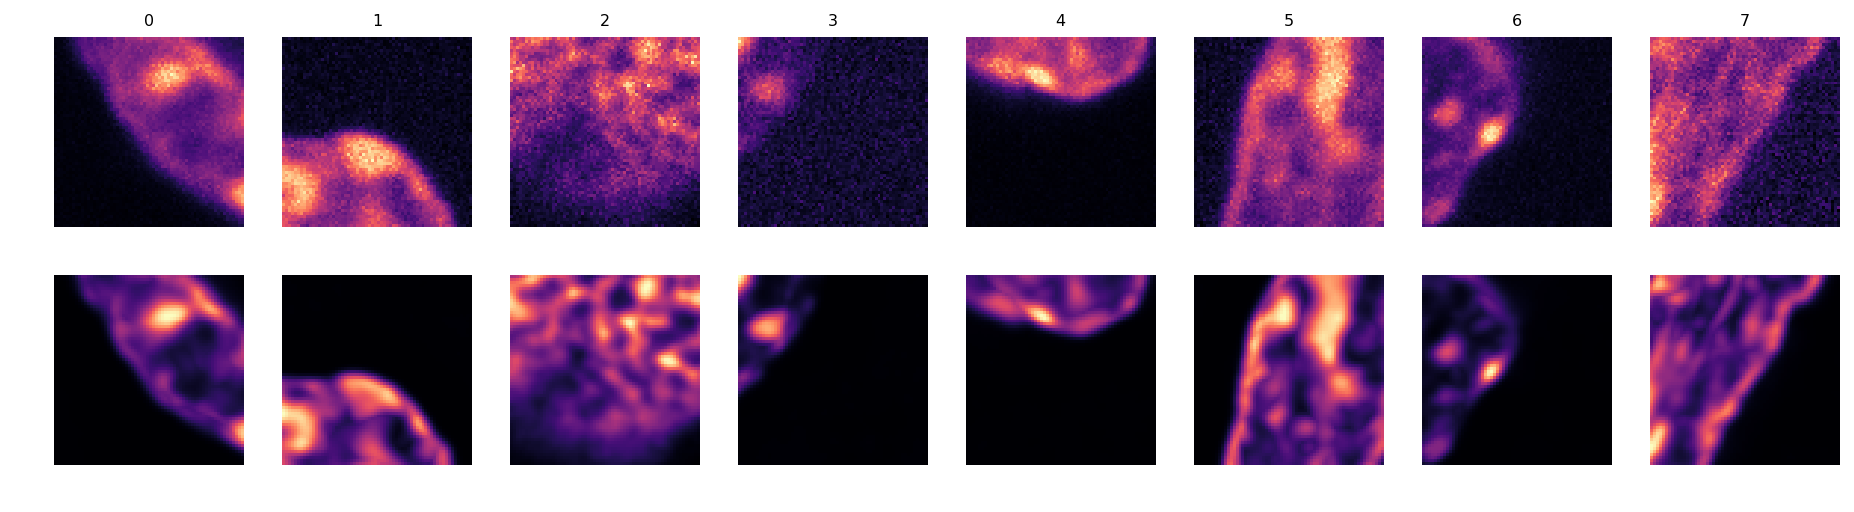

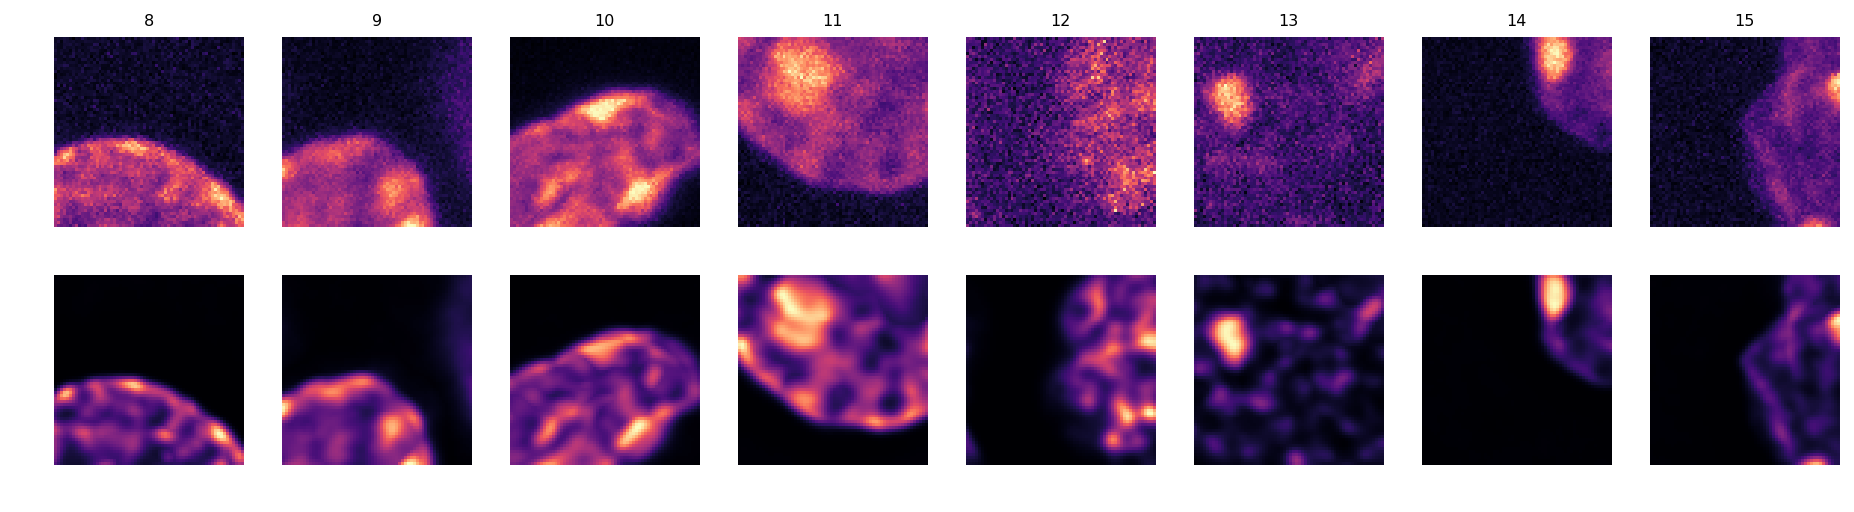

In [66]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;